In [110]:
!pip install factor_analyzer

  Using cached factor_analyzer-0.5.1.tar.gz (42 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42621 sha256=064c683c42c984515a93902b61f43c6c0447f32f990b6d7aa47df9ce6bf372be
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
# For n-way ANOVA
from statsmodels.formula.api import ols      
# For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary Libraries
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Problem - 1

### 1.1 Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [3]:
# read the data
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [4]:
#print first 5 rows
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
#print last 5 rows
df.tail(5).T

,23061,23062,23063,23064,23065
Timestamp,2020-9-13-7,2020-11-2-7,2020-9-14-22,2020-11-18-2,2020-9-14-0
InventoryType,Format5,Format5,Format5,Format4,Format5
Ad - Length,720,720,720,120,720
Ad- Width,300,300,300,600,300
Ad Size,216000,216000,216000,72000,216000
Ad Type,Inter220,Inter224,Inter218,inter230,Inter221
Platform,Web,Web,App,Video,App
Device Type,Mobile,Desktop,Mobile,Mobile,Mobile
Format,Video,Video,Video,Video,Video
Available_Impressions,1,3,2,7,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [8]:
df.shape

(23066, 19)

In [9]:
# check for null values
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
display(df.isna().mean())

Timestamp                0.000000
InventoryType            0.000000
Ad - Length              0.000000
Ad- Width                0.000000
Ad Size                  0.000000
Ad Type                  0.000000
Platform                 0.000000
Device Type              0.000000
Format                   0.000000
Available_Impressions    0.000000
Matched_Queries          0.000000
Impressions              0.000000
Clicks                   0.000000
Spend                    0.000000
Fee                      0.000000
Revenue                  0.000000
CTR                      0.205324
CPM                      0.205324
CPC                      0.205324
dtype: float64

#### There are null values presented in CTR,CPM,CPC.

In [11]:
# check for duplicate values
df.duplicated().sum()

0

#### There are no duplicate values.

#### 1.1 Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [12]:
df_1 = df[['CTR','CPM','CPC']]

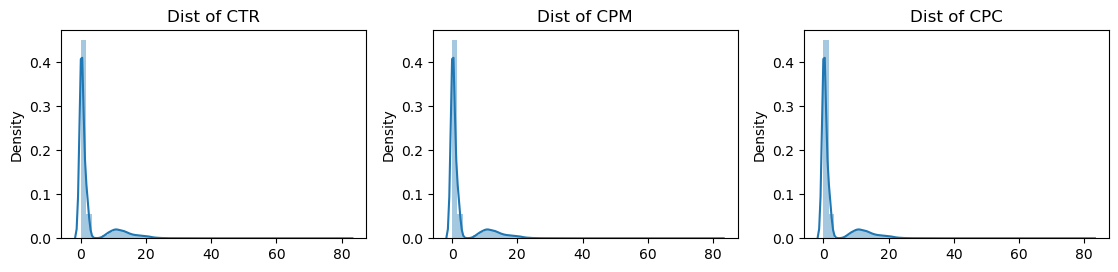

In [13]:
columns=df_1.columns

plt.figure(figsize = (15,10))
for i in range(len(columns)):
    plt.subplot(4, 4, i + 1)
    sns.distplot(df_1)
    plt.title('Dist of {}'.format(columns[i]))
    plt.tight_layout()
    
## OBS: Excluding the nan values, The distribution looks normal for all 3 Features. 
    #To keep the data symmetric we will impute the null values with median

Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing.

In [14]:
#CPM = (Total Campaign Spend / Number of Impressions) * 1,000
#CPC = Total Cost (spend) / Number of Clicks
#CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

def cal_cpm(x): 
    spend=df.Spend 
    impressions=df.Impressions
    cpm = (spend/impressions)*1000
    return cpm

def cal_cpc(x): 
    clicks=df.Clicks 
    spend=df.Spend
    cpc = (spend/clicks)
    return cpc

def cal_ctr(x): 
    clicks=df.Clicks 
    impressions=df.Impressions
    ctr = (clicks/impressions)*100
    return ctr

In [15]:
df['CPM']= df[['CPM']].apply(lambda x: cal_cpm(x))
df['CPC']= df[['CPC']].apply(lambda x: cal_cpc(x))
df['CTR']= df[['CTR']].apply(lambda x: cal_ctr(x))

In [16]:
display(df.isna().sum())

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### 1.2 Data Preprocessing - Checking and Treating Outliers

If Outliers are treated after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

So, if you are about to use a procedure where scaled data in needed, we should definitely remove your outliers first, then standardize. Otherwise you may end up with different variables having different standard deviations (which is an issue, for example, in PCA analysis)

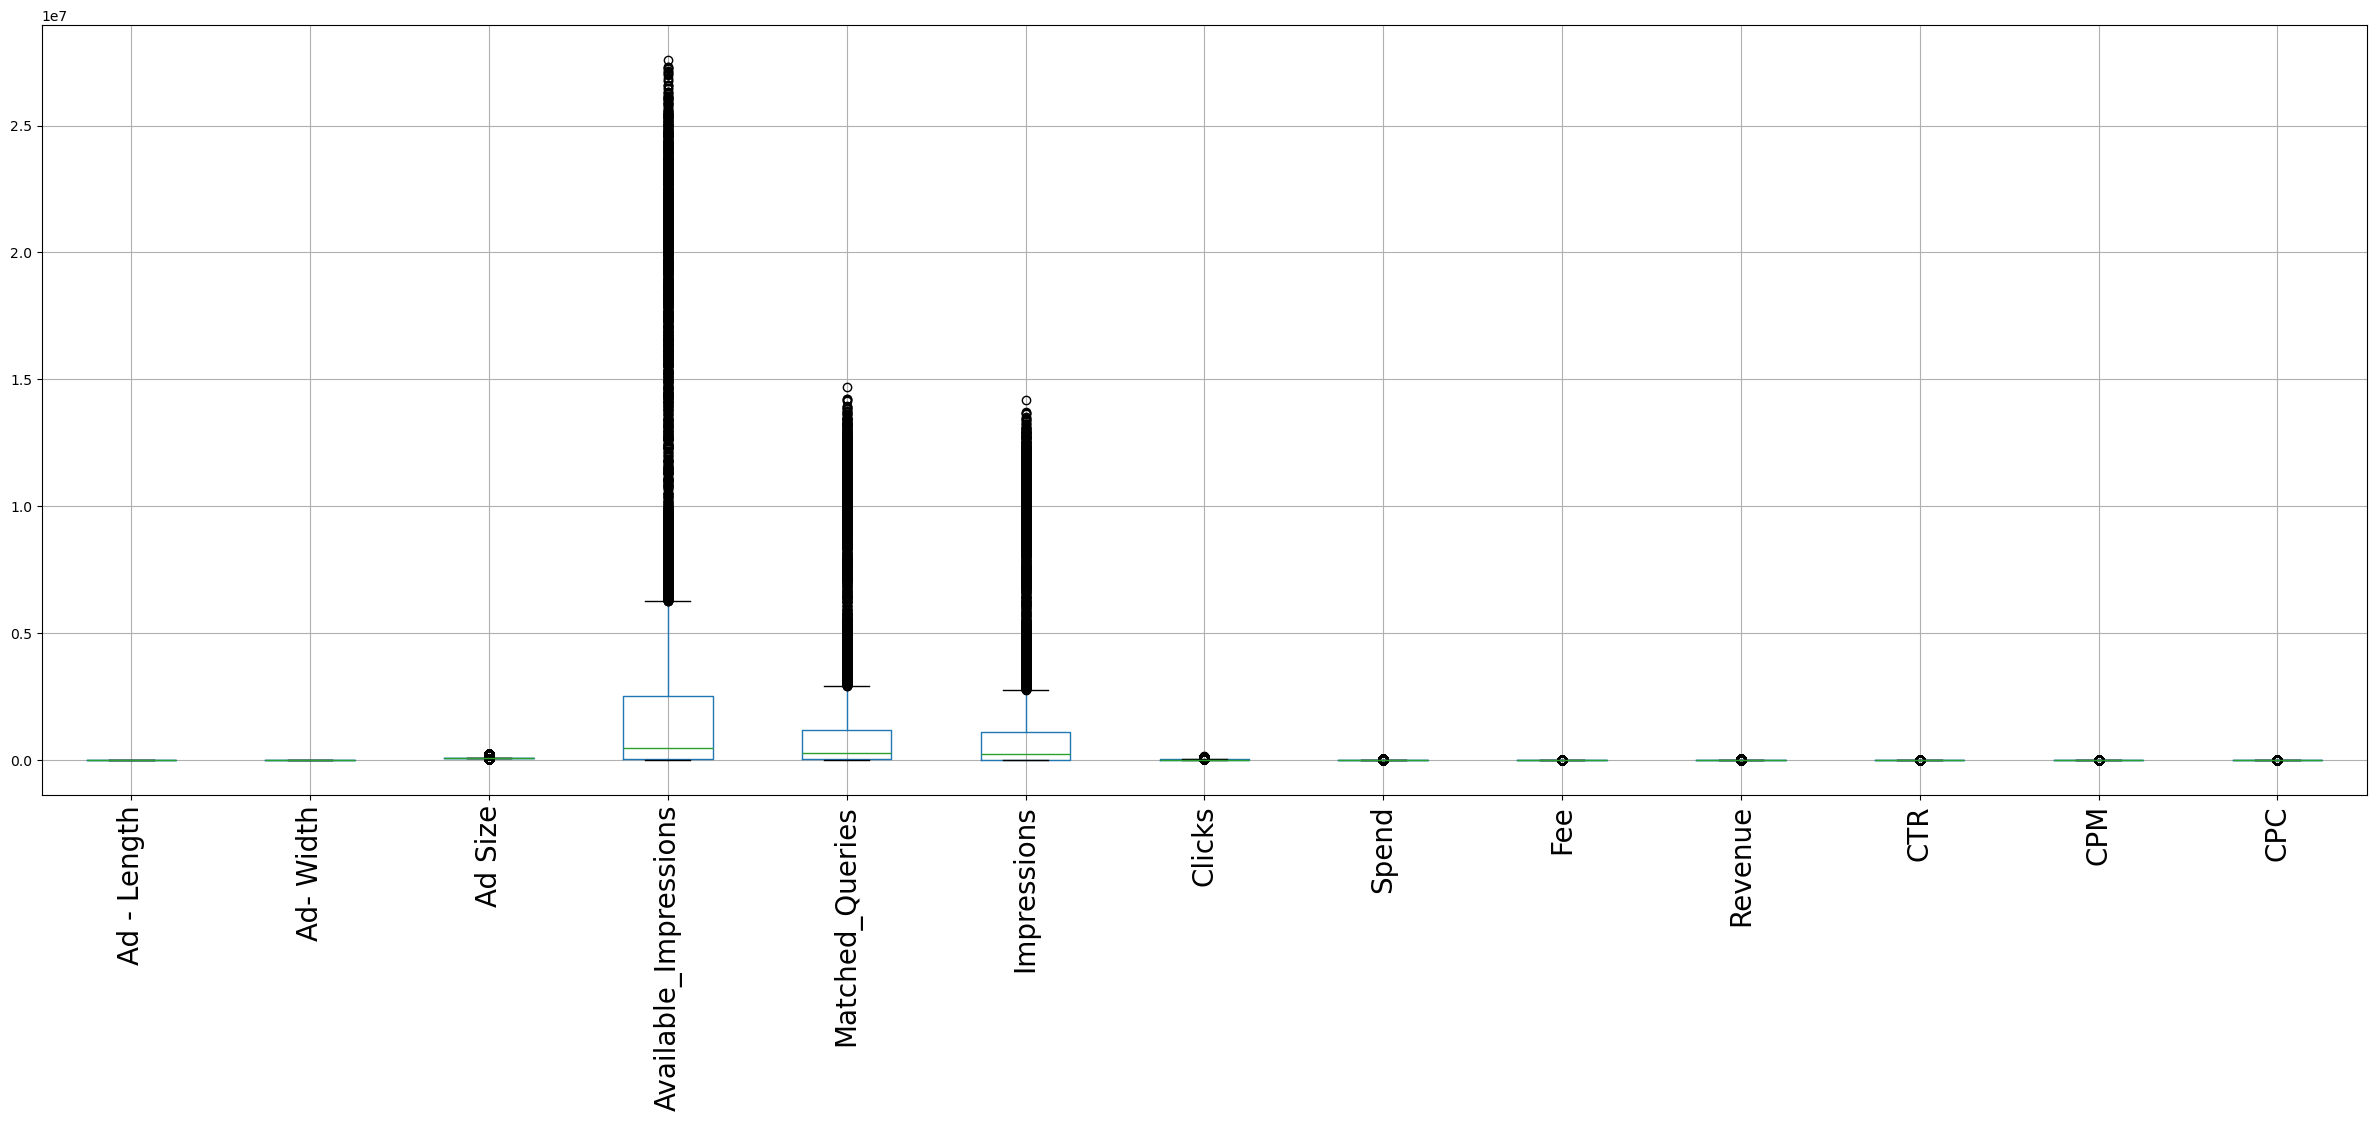

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)

df_num.boxplot(figsize=(30,10));
plt.xticks(fontsize=20, rotation=90);

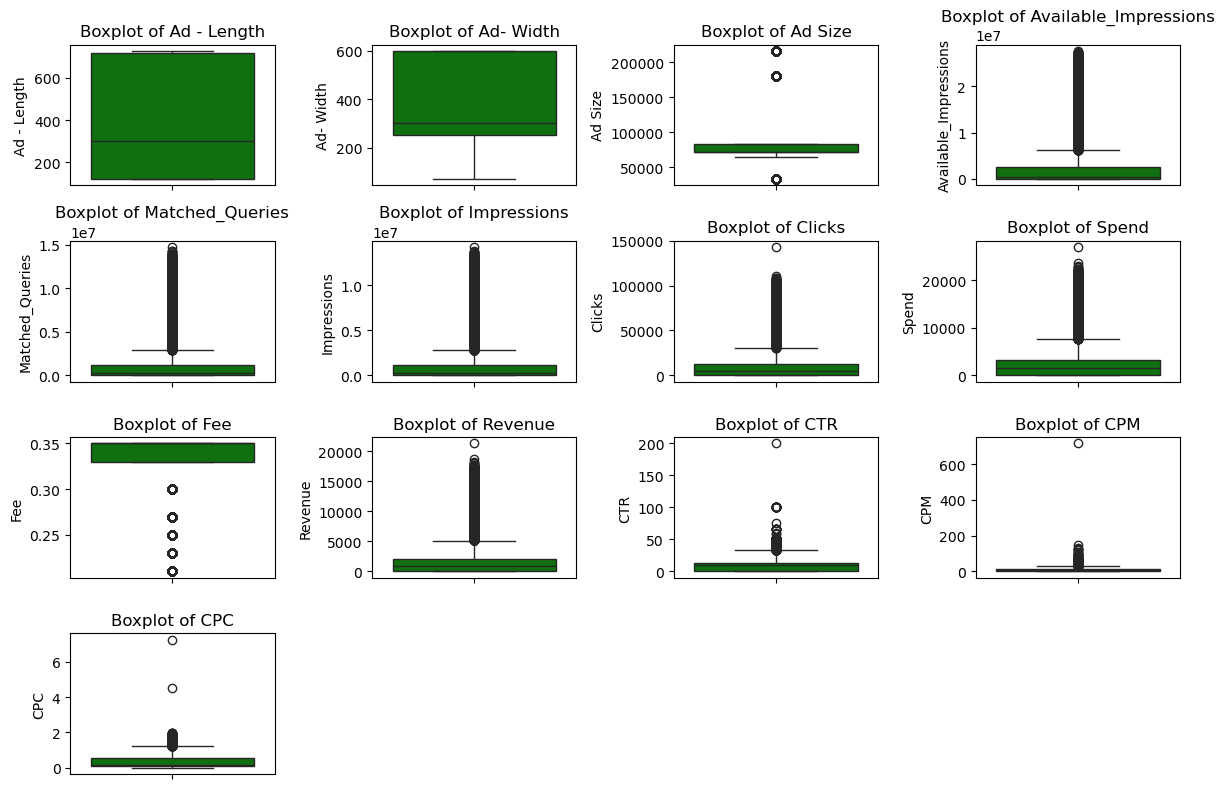

In [19]:
plt.figure(figsize=(12,8))
feature_list=df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df_num[feature_list[i]],data=df_num, color = "green")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

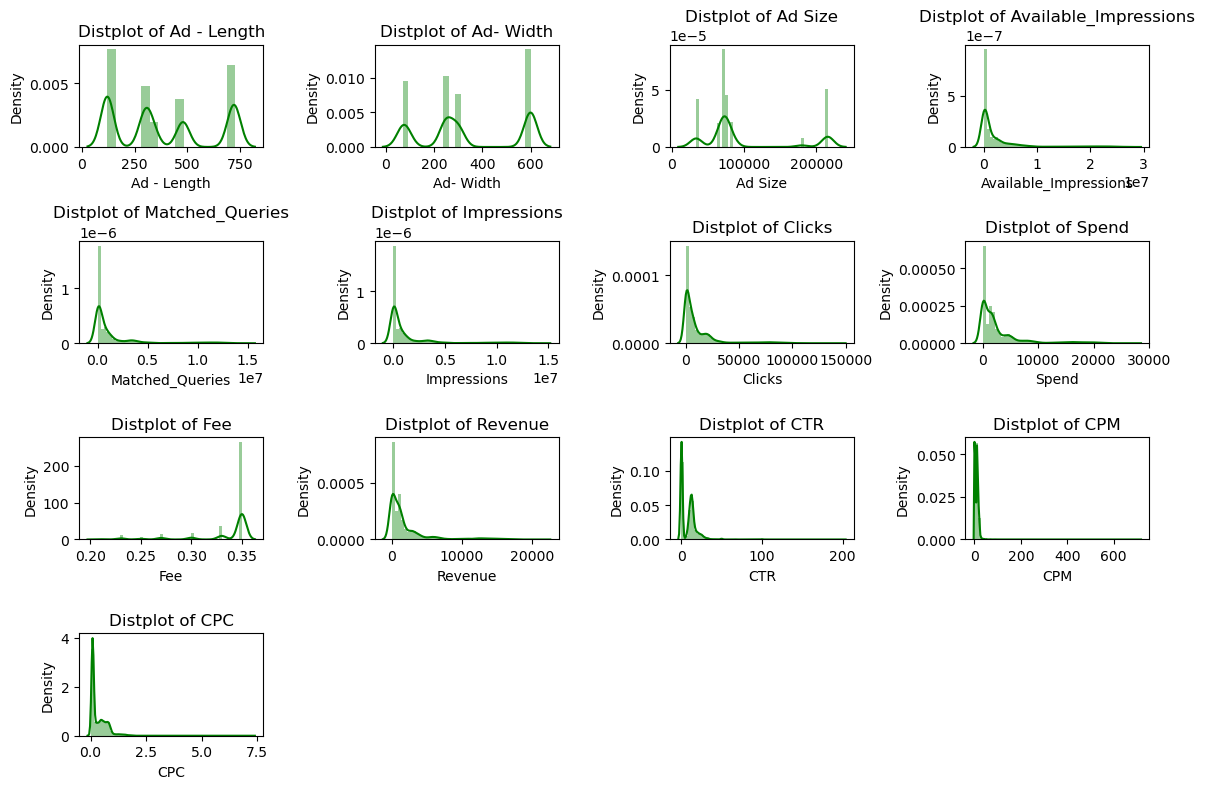

In [20]:
plt.figure(figsize=(12,8))
feature_list=df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_num[feature_list[i]], color = "green")
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Observation (outliers) : From the above set of box plots, its evident that Outliers are present in all numeric Features except for Ad-length and Ad-width

In [21]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [22]:
for i in feature_list:
    LL,UL=remove_outlier(df_num[i])
    df_num[i]=np.where(df_num[i]>UL,UL,df_num[i])
    df_num[i]=np.where(df_num[i]<LL,LL,df_num[i])

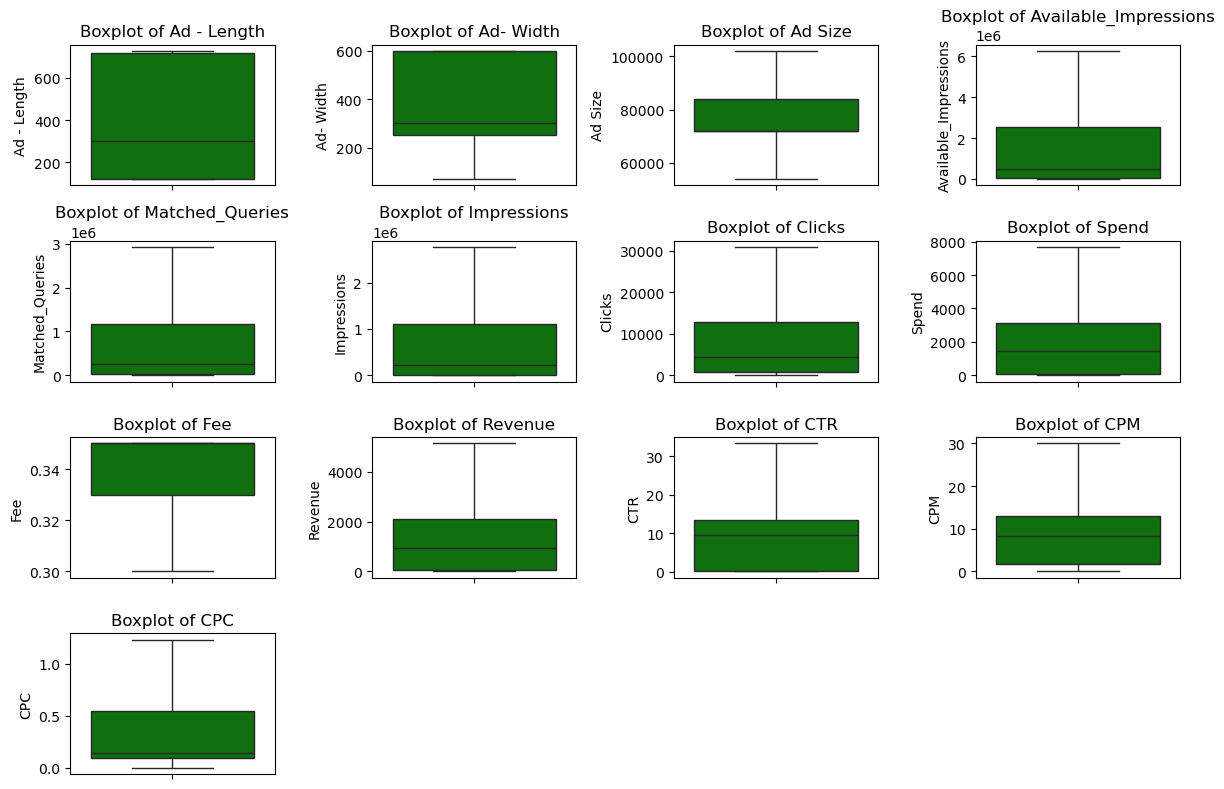

In [23]:
plt.figure(figsize=(12,8))
feature_list=df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df_num[feature_list[i]],data=df_num, color = 'green')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [24]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [25]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.657684e+04,1.538132e+04,54000.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.402883e-01,1.812855e-02,0.300000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


In [26]:
#Scale the data
from scipy.stats import zscore
df_scaled = df_num.apply(zscore)

In [27]:
df_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-1.194498,-1.042561


In [28]:
#Summary of scaled dataset
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,3.055833e-16,1.000022,-1.467840,-0.297564,-0.297564,0.482620,1.652896
Available_Impressions,23066.0,9.857525e-18,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.971505e-17,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,0.000000e+00,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,-1.182903e-16,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,-9.857525e-17,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,1.143473e-15,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.943010e-17,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


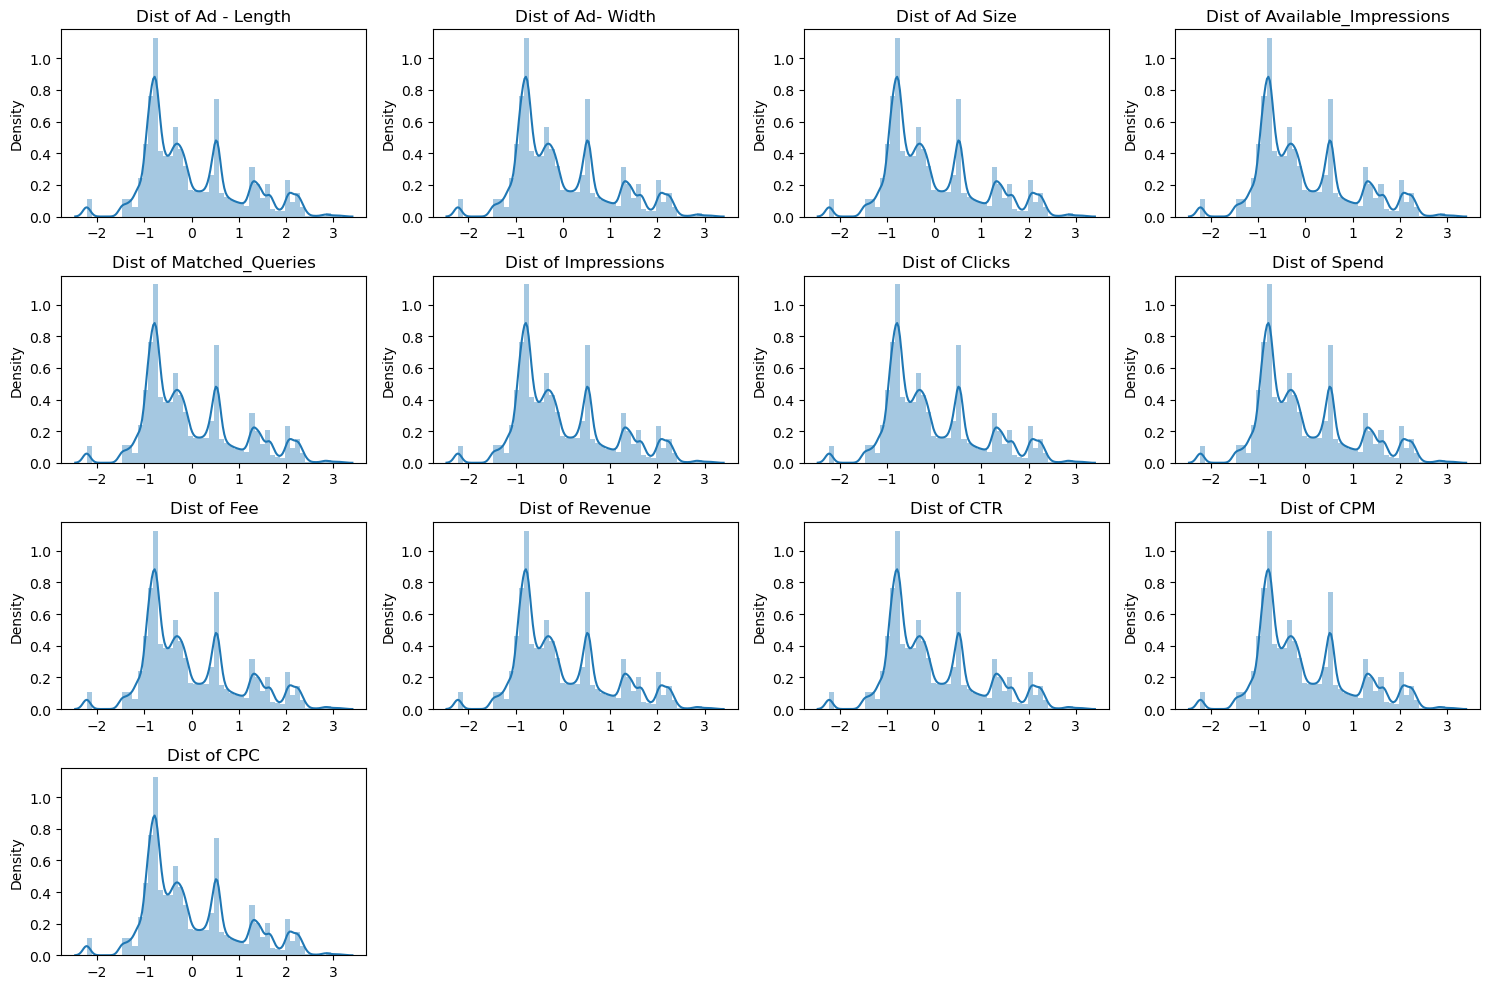

In [29]:
# Plot the distribution of each column in the dataframe.

sc_cols=df_scaled.columns

plt.figure(figsize = (15,10))
for i in range(len(sc_cols)):
    plt.subplot(4, 4, i + 1)
    sns.distplot(df_scaled)
    plt.title('Dist of {}'.format(sc_cols[i]))
    plt.tight_layout()

### 1.3 Hierarchical Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

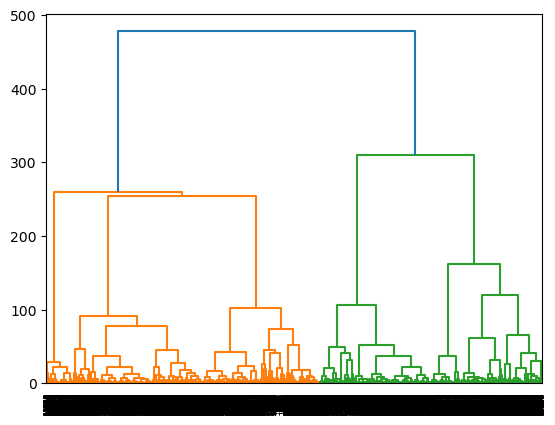

In [30]:
wardlink = linkage(df_scaled, method='ward', metric='euclidean')
dend=dendrogram(wardlink)

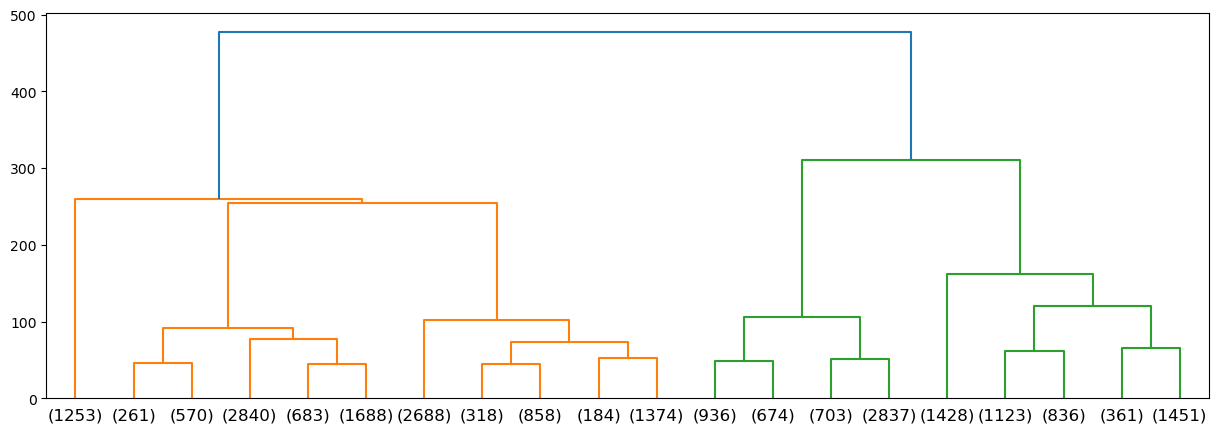

In [31]:
wardlink = linkage(df_scaled, method='ward',)
plt.figure(figsize = (15,5))
dend=dendrogram(wardlink,truncate_mode='lastp',p = 20,)

In [214]:
clusters = fcluster(wardlink, 150, criterion='distance')
clusters

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [215]:
df_scaled['clusters'] = clusters

In [216]:
df['clusters'] = clusters

In [217]:
df_scaled.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Cluster_kmeans,sil_width
3241,-1.134891,1.290590,-0.297564,-0.739885,-0.762487,-0.761434,-0.775265,-0.865361,0.535724,-0.853473,0.485707,0.161679,-0.801567,2,1,0.675121
14550,-0.364496,-0.432797,-0.102518,1.370773,2.070914,2.056111,-0.172209,0.868673,-0.567532,0.858199,-0.968589,-0.980827,0.984663,6,2,0.662116
16914,-1.134891,1.290590,-0.297564,-0.256924,-0.038016,-0.104734,2.361729,2.271900,-2.222416,2.244218,0.616570,0.731232,-0.728121,1,4,0.801299
22956,1.433093,-0.186599,1.652896,-0.756180,-0.779262,-0.768803,-0.867384,-0.893112,0.535724,-0.880038,3.035808,3.162718,-0.821435,3,3,0.238667
20400,1.433093,-0.186599,1.652896,-0.583383,-0.562100,-0.582979,0.936143,-0.119795,0.535724,-0.139835,0.152391,0.301883,-0.699497,3,8,0.478337


In [218]:
# Total 11 clusters formed
df_scaled.clusters.unique()

array([4, 3, 2, 6, 5, 1])

In [219]:
# Cluster Frequency
df_scaled['clusters'].value_counts().sort_index()

clusters
1    1253
2    6042
3    5422
4    5150
5    1428
6    3771
Name: count, dtype: int64

### 1.4 - K-means Clustering

In [220]:
k_means = KMeans(n_clusters = 1)
k_means.fit(df_scaled)
k_means.inertia_

538653.3772598961

In [221]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(df_scaled)
k_means.inertia_

315611.93268527393

In [222]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(df_scaled)
k_means.inertia_

228026.96989037778

In [223]:
k_means = KMeans(n_clusters = 4,random_state=0)
k_means.fit(df_scaled)
k_means.inertia_

176285.77109480483

In [224]:
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(df_scaled)
k_means.inertia_

131478.21110603533

In [225]:
k_means = KMeans(n_clusters = 6,random_state=0)
k_means.fit(df_scaled)
k_means.inertia_

103093.03968822763

In [226]:
wss =[]

In [227]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [228]:
wss

[538653.3772598961,
 315611.93268527393,
 228027.27637639886,
 176285.65876519063,
 131478.20411462765,
 101499.44984485646,
 78294.74061519315,
 59481.88910735882,
 46848.36780145314,
 36468.920652927656]

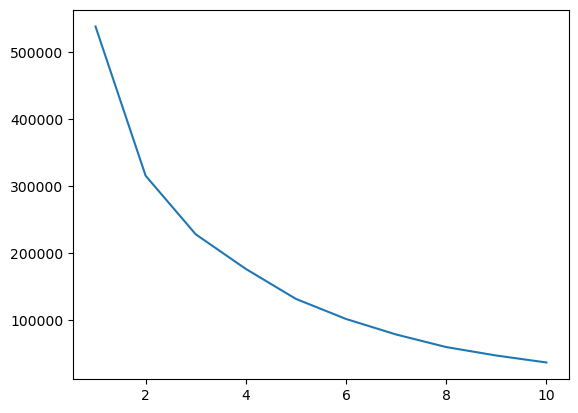

In [229]:
plt.plot(range(1,11), wss);

In [234]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_scaled)
labels = k_means.labels_

In [235]:
df["Cluster_kmeans"] = labels

In [236]:
df_scaled["Cluster_kmeans"] = labels
df_scaled.head()
dfi.export(df.tail(), 'dataframe_tail.png')

In [241]:
silhouette_score(df_scaled,labels)

0.38995243257079415

In [242]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_scaled)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 5, 1, 5])

In [244]:
for i in range(2, 11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    labels = KM.labels_
    print("For no of clusters={}".format(i))
    print(KM.inertia_)
    print("The Silhouette Score is {}".format(silhouette_score(df_scaled, labels)))

For no of clusters=2
247796.4319281311
The Silhouette Score is 0.38995243257079415
For no of clusters=3
168269.1395149021
The Silhouette Score is 0.4292345768048998
For no of clusters=4
116703.24419495797
The Silhouette Score is 0.49763311564986534
For no of clusters=5
80508.89441006731
The Silhouette Score is 0.5368019999484301
For no of clusters=6
62223.23511612434
The Silhouette Score is 0.5771956417041538
For no of clusters=7
51975.80416990498
The Silhouette Score is 0.5699349680197034
For no of clusters=8
43505.337241480294
The Silhouette Score is 0.5548253607459702
For no of clusters=9
38664.1443786622
The Silhouette Score is 0.5715907931406701
For no of clusters=10
35206.3968116153
The Silhouette Score is 0.5076271531614043


In [245]:
df_scaled['Cluster_kmeans'].value_counts().sort_index()

Cluster_kmeans
0    2544
1    4057
2    5798
3    2970
4    6189
5    1508
Name: count, dtype: int64

In [247]:
sil_width = silhouette_samples(df_scaled,labels)

In [248]:
df["sil_width"] = sil_width

In [57]:
df_scaled["sil_width"] = sil_width
df_scaled

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Cluster_kmeans,sil_width
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.893170,0.535724,-0.880093,-0.958836,-1.194498,-1.042561,4,5,0.157972
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.893170,0.535724,-0.880093,-0.953835,-1.194498,-1.042561,4,5,0.158023
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.893170,0.535724,-0.880093,-0.962218,-1.194498,-1.042561,4,5,0.157913
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.893170,0.535724,-0.880093,-0.971871,-1.194498,-1.042561,4,5,0.157698
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.893170,0.535724,-0.880093,-0.946281,-1.194498,-1.042561,4,5,0.158039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435,3,3,0.238674
23062,1.433093,-0.186599,1.652896,-0.756181,-0.779264,-0.768805,-0.867488,-0.893154,0.535724,-0.880078,3.035808,1.712113,-0.916204,3,3,0.288502
23063,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893150,0.535724,-0.880074,3.035808,3.162718,-0.884614,3,3,0.238144
23064,-1.134891,1.290590,-0.297564,-0.756179,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435,2,1,0.392245


In [58]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Cluster_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,1,0.00,0.35,0.0000,0.309598,0.0,0.00,4,5,0.157972
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,1,0.00,0.35,0.0000,0.350877,0.0,0.00,4,5,0.158023
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,1,0.00,0.35,0.0000,0.281690,0.0,0.00,4,5,0.157913
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,1,0.00,0.35,0.0000,0.202020,0.0,0.00,4,5,0.157698
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,1,0.00,0.35,0.0000,0.413223,0.0,0.00,4,5,0.158039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,...,1,0.07,0.35,0.0455,100.000000,70.0,0.07,3,3,0.238674
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,...,1,0.04,0.35,0.0260,50.000000,20.0,0.04,3,3,0.288502
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,...,1,0.05,0.35,0.0325,100.000000,50.0,0.05,3,3,0.238144
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,...,1,0.07,0.35,0.0455,100.000000,70.0,0.07,2,1,0.392245


In [246]:
clust_profile=df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)
clust_profile=clust_profile.groupby('Cluster_kmeans').mean()
clust_profile['freq']=df.Cluster_kmeans.value_counts().sort_index()
a = df
a['Clus_kmeans'] = labels
clust_profile.T

Cluster_kmeans,0,1,2,3,4,5
Ad - Length,585.518868,4.652640e+02,120.310452,666.278788,4.236465e+02,138.381963
Ad- Width,324.036950,1.995169e+02,599.939634,306.380471,1.457295e+02,576.790451
Ad Size,182466.981132,7.524420e+04,72168.161435,201620.202020,5.327849e+04,75230.769231
Available_Impressions,96564.252752,1.039348e+07,31922.152984,365758.123569,1.808062e+06,811693.090849
Matched_Queries,50610.035770,5.626474e+06,19893.140738,198510.360943,8.646094e+05,571231.505305
Impressions,44466.499607,5.448141e+06,13683.866333,168224.074411,8.264839e+05,481819.978117
Clicks,2892.957547,1.125094e+04,2015.829079,20953.694949,3.256739e+03,65802.228117
Spend,320.582119,8.634991e+03,220.571908,1796.794226,1.508504e+03,7050.280007
Fee,0.350000,2.906507e-01,0.349976,0.349104,3.491436e-01,0.287487
Revenue,208.378412,6.364918e+03,143.446296,1171.041850,9.833242e+02,5064.143266


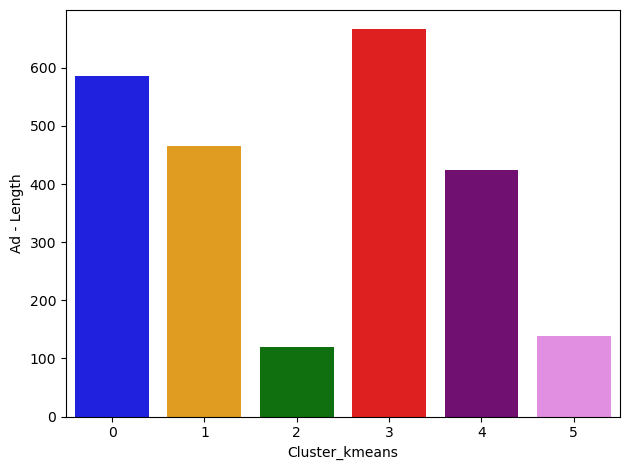

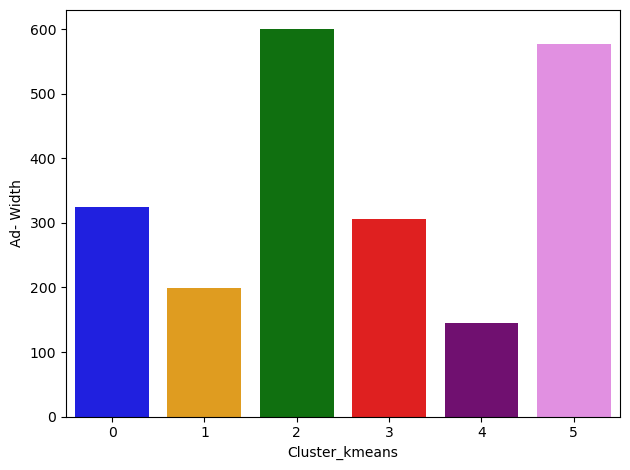

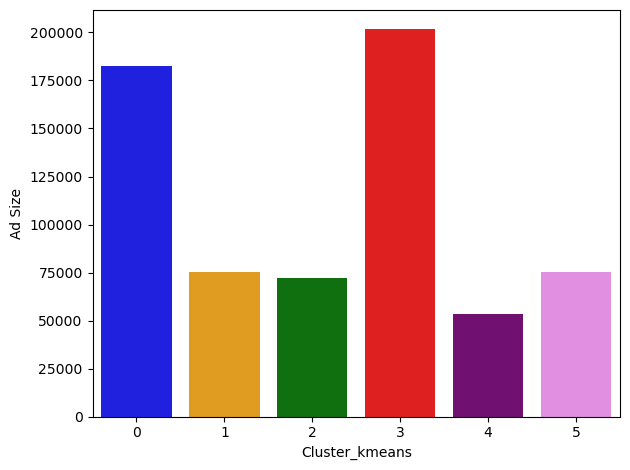

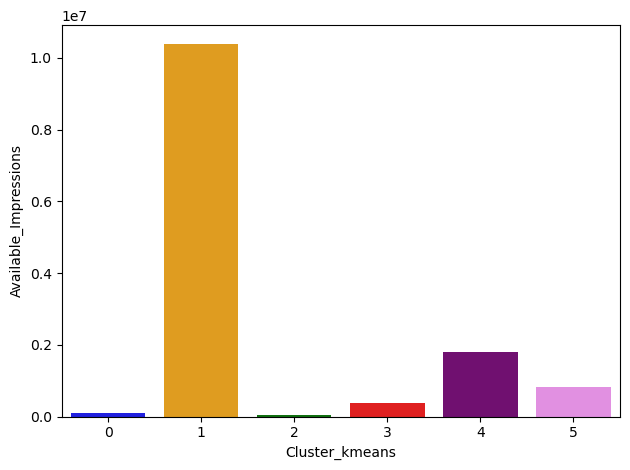

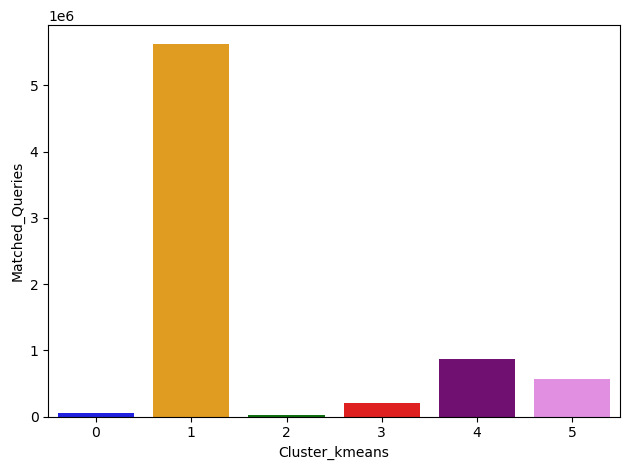

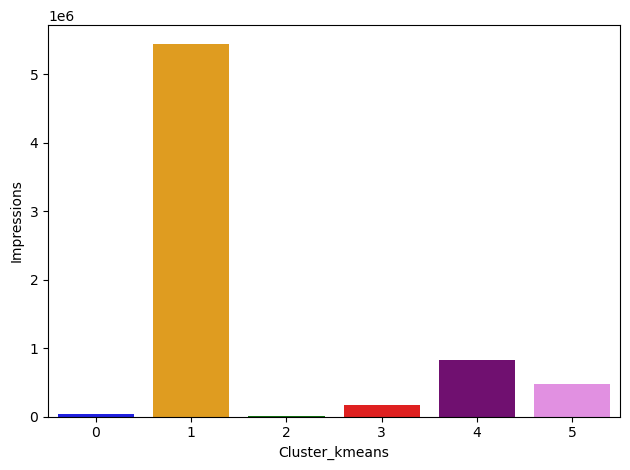

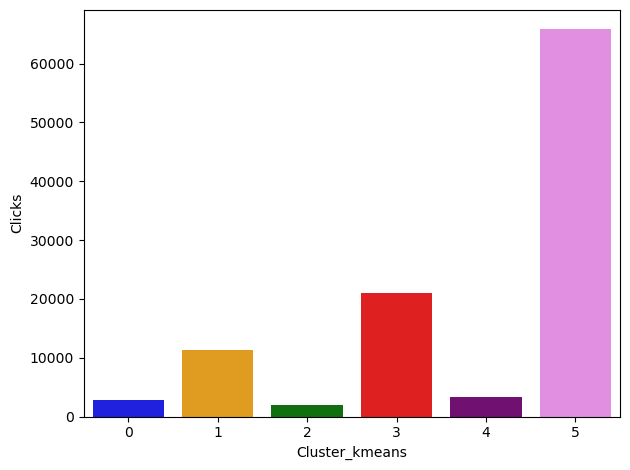

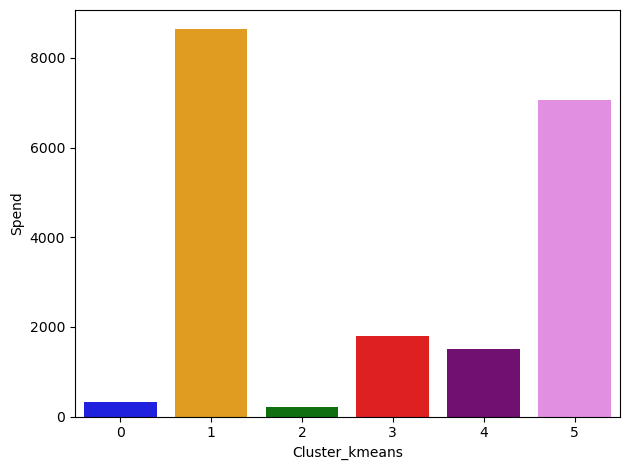

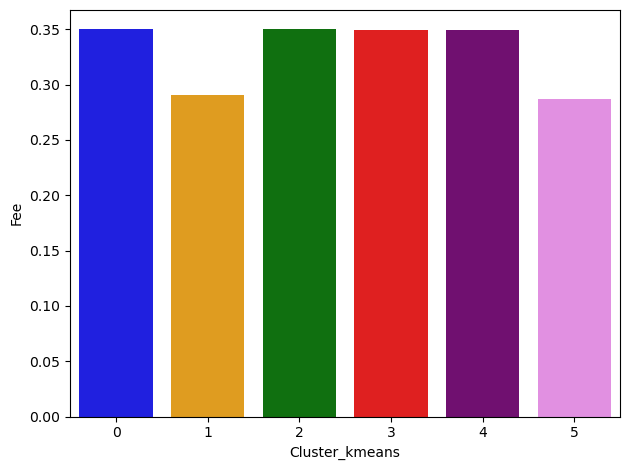

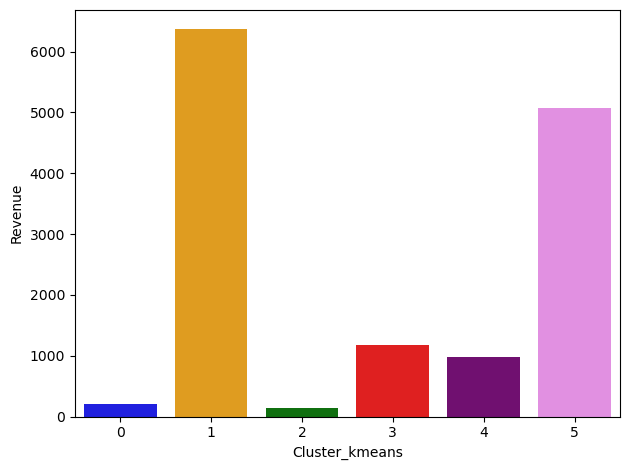

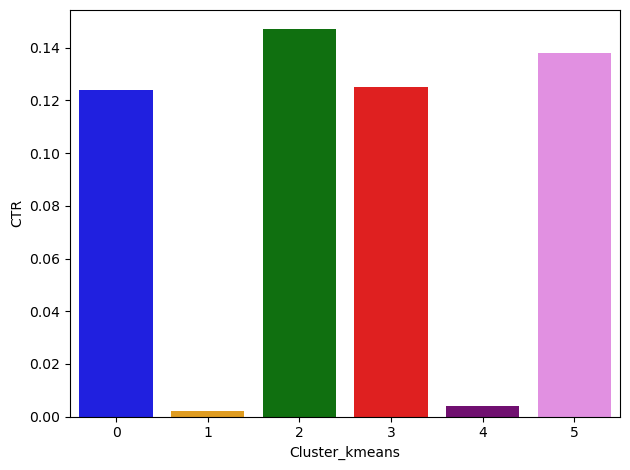

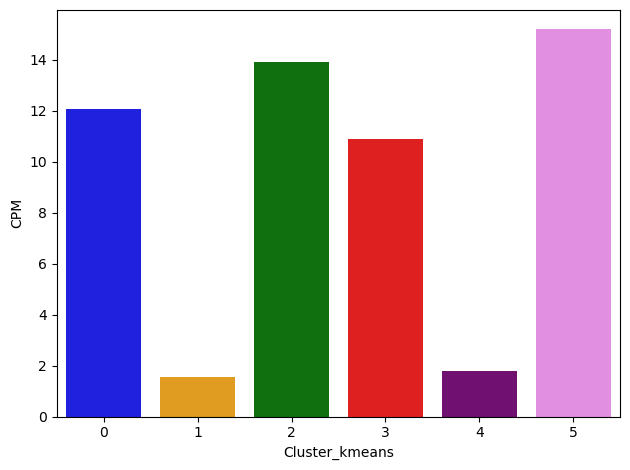

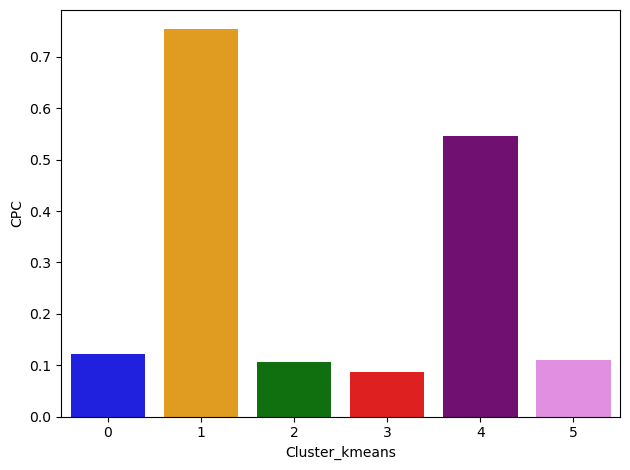

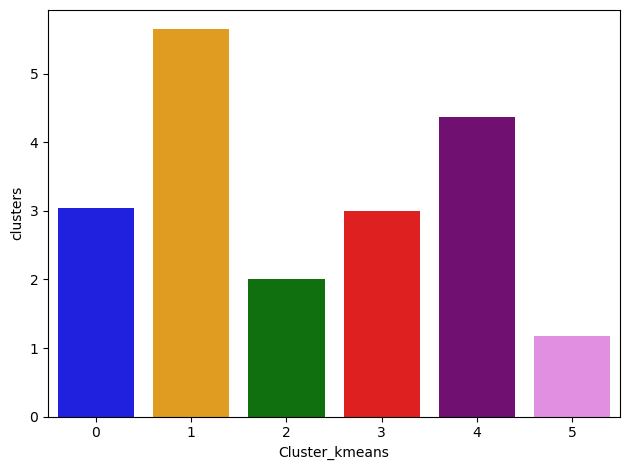

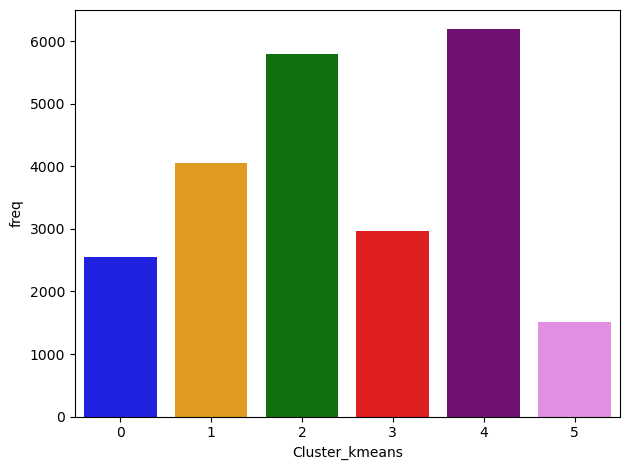

In [252]:
for i in clust_profile.columns:
  sns.barplot(y = clust_profile[i], x = clust_profile.index, data = clust_profile,palette = ["blue", "orange", "green", "red", "purple", "violet"])
  plt.tight_layout()
  plt.show()

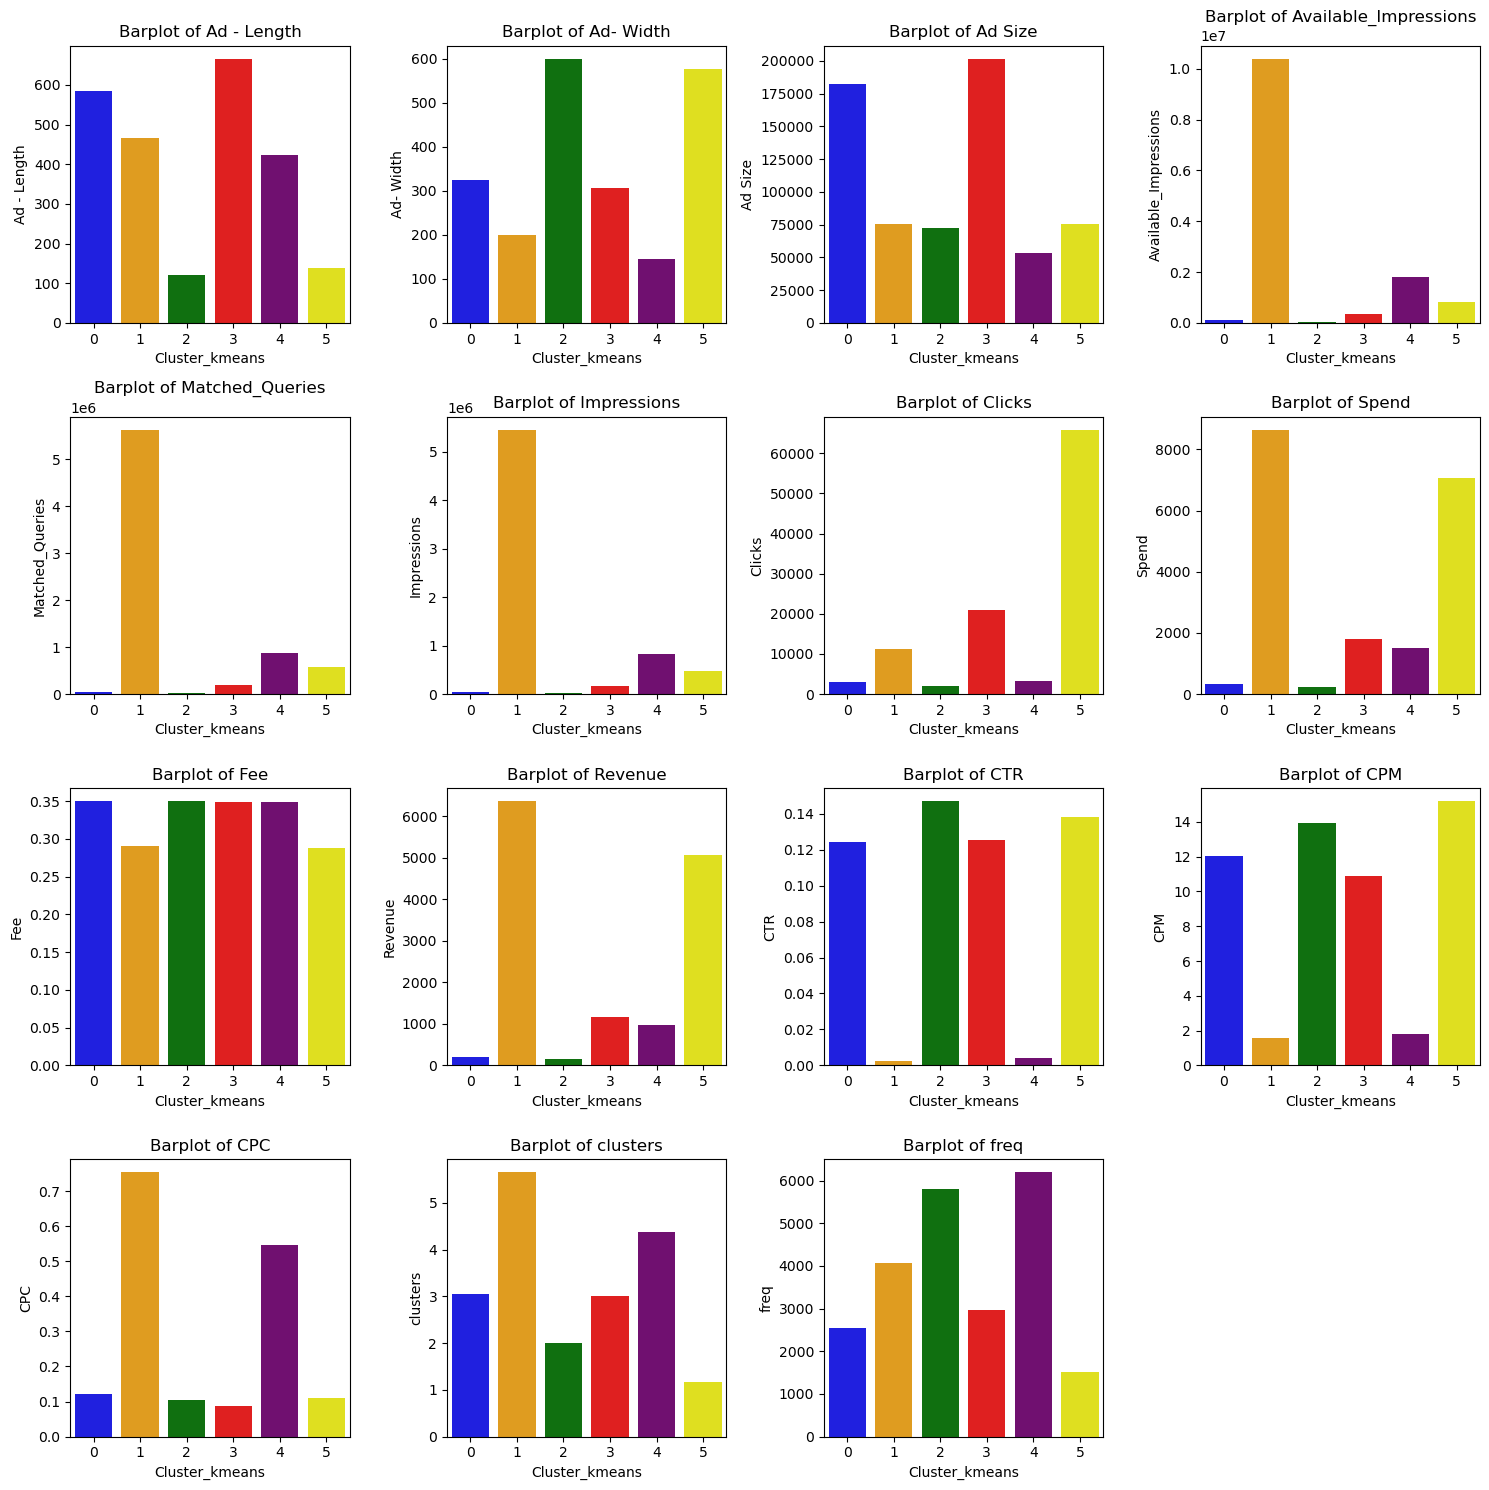

In [255]:
import math

# Calculate the number of rows and columns needed
n = len(clust_profile.columns)
rows = cols = math.ceil(math.sqrt(n))

fig, axs = plt.subplots(rows, cols, figsize=(15, 15))  # Adjust the figure size as needed

# Flatten the axes array, in case we have fewer plots than subplots
axs = axs.flatten()

for i in range(n):
    sns.barplot(y=clust_profile[clust_profile.columns[i]], x=clust_profile.index, data=clust_profile, ax=axs[i], palette=["blue", "orange", "green", "red", "purple", "yellow"])
    axs[i].set_title('Barplot of {}'.format(clust_profile.columns[i]))

# Remove the unused subplots
for i in range(n, rows*cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [62]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['Clicks'],aggfunc=np.mean)

Device Type,Desktop,Mobile
Cluster_kmeans,,
0,14798.108642,14467.467309
1,1932.695069,1876.040752
2,5582.584674,5540.329431
3,14552.251029,14341.473373
4,65777.215722,65707.752066
5,3260.504637,3256.474827


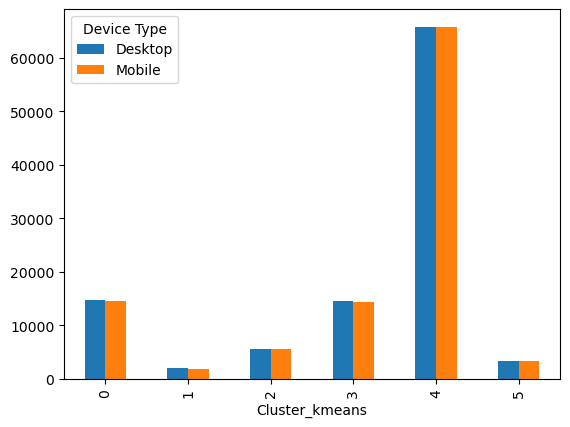

In [63]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['Clicks'],aggfunc=np.mean).plot(kind='bar');

In [64]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['Spend'],aggfunc=np.mean)

Device Type,Desktop,Mobile
Cluster_kmeans,,
0,12231.121901,12124.001136
1,206.234602,207.377217
2,3616.764636,3603.272831
3,1255.262499,1254.676857
4,7032.511554,7043.678864
5,1232.521184,1236.407404


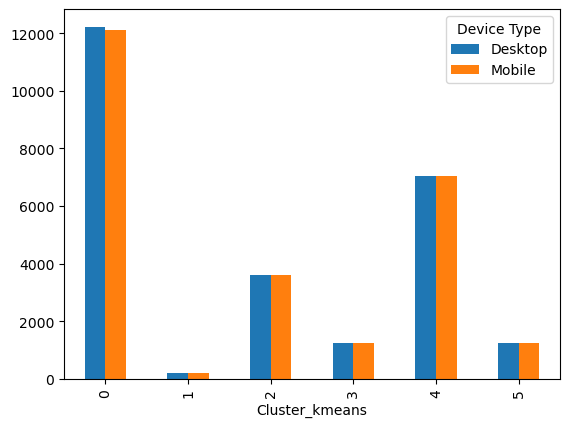

In [65]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['Spend'],aggfunc=np.mean).plot(kind='bar');

In [66]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['Revenue'],aggfunc=np.mean)

Device Type,Desktop,Mobile
Cluster_kmeans,,
0,9243.607330,9157.779886
1,134.105277,134.869976
2,2407.526612,2398.090341
3,817.803491,817.320235
4,5048.963459,5059.109156
5,801.209319,803.772784


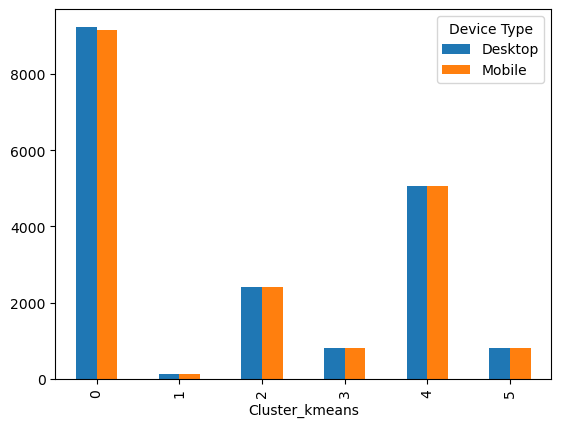

In [67]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['Revenue'],aggfunc=np.mean).plot(kind='bar');

In [68]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['CPM'],aggfunc=np.mean)

Device Type,Desktop,Mobile
Cluster_kmeans,,
0,1.629837,1.657086
1,14.560995,14.831009
2,1.605973,1.614496
3,12.103770,12.147780
4,15.449728,15.364300
5,1.782974,1.784608


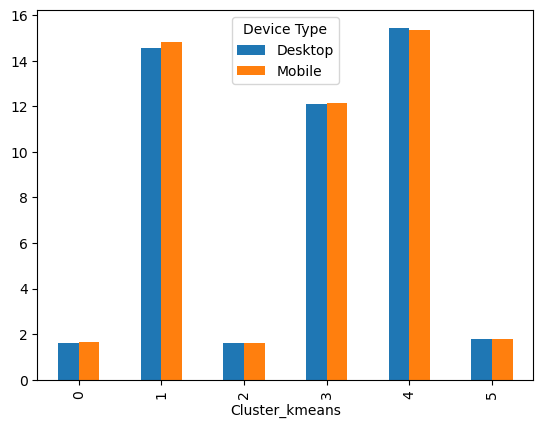

In [69]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['CPM'],aggfunc=np.mean).plot(kind='bar');

In [70]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['CTR'],aggfunc=np.mean)

Device Type,Desktop,Mobile
Cluster_kmeans,,
0,0.202902,0.200721
1,16.123664,16.081285
2,0.228507,0.229312
3,13.821226,13.885580
4,13.789323,13.731714
5,0.449947,0.445778


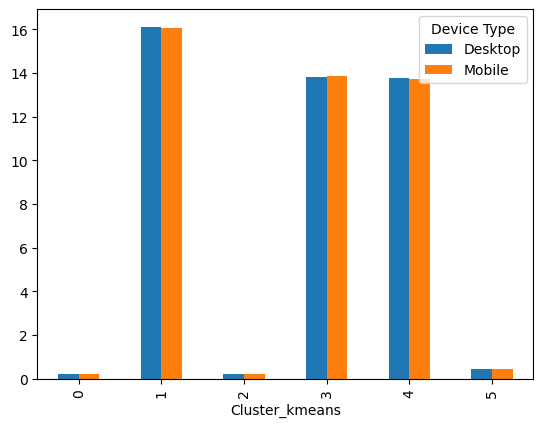

In [71]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['CTR'],aggfunc=np.mean).plot(kind='bar');

In [72]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['CPC'],aggfunc=np.mean)

Device Type,Desktop,Mobile
Cluster_kmeans,,
0,0.831574,0.857649
1,0.101966,0.101802
2,0.765023,0.763597
3,0.089483,0.090316
4,0.112058,0.111906
5,0.453396,0.457362


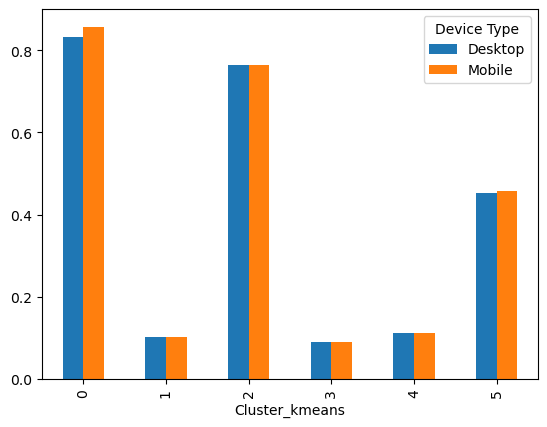

In [73]:
pd.crosstab(df['Cluster_kmeans'], df['Device Type'],values=df['CPC'],aggfunc=np.mean).plot(kind='bar');

## Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [28]:
#Loading the dataset
df1 = pd.read_excel('PCA+India+Data_Census.xlsx')

In [29]:
#Checking head & tail of the data
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [30]:
df1.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [31]:
#size of dataset
df1.shape

(640, 61)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [33]:
# 5 point Summary
df1.describe()


,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [34]:
#Checking for Null values
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [35]:
#Checking for duplicate values
df1.duplicated().sum()

0

In [36]:
df1['Area Name'].value_counts()

Area Name
Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: count, Length: 635, dtype: int64

In [37]:
df1.State.value_counts()

State
Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
La

In [38]:
#dropping columns other than not usefull for PCA
df_pca = df1.drop(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH'], axis=1)

In [39]:
#no of features for PCA
len(df_pca.columns)

56

In [40]:
df_n=df1.iloc[:, 1:9]  #taking 5 features 
df_n

,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06
0,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196
1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733
2,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018
3,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677
4,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587
...,...,...,...,...,...,...,...,...
635,636,Puducherry,Mahe,3333,8154,11781,1146,1203
636,637,Puducherry,Karaikal,10612,12346,21691,1544,1533
637,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225
638,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664


In [41]:
#creating a column for Total Gender_Ratio
df_n['TOT_GR']=df_n['TOT_M']/df_n['TOT_F']  
#column for Gender_Ratio of age group 0-6
df_n['GR_06']=df_n['M_06']/df_n['F_06']     
df_n   

,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,TOT_GR,GR_06
0,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,0.784938,0.946094
1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,0.847762,1.200643
2,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,0.597045,1.062868
3,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0.661912,0.831610
4,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,0.686802,1.124264
...,...,...,...,...,...,...,...,...,...,...
635,636,Puducherry,Mahe,3333,8154,11781,1146,1203,0.692131,0.952618
636,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,0.569176,1.007175
637,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0.588973,1.008889
638,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0.649026,1.088855


In [42]:
# creating a pivot table State wise gender Ratio and sorting it in descending order
pd.pivot_table(df_n, 'TOT_GR', index=['State'], aggfunc=np.mean).sort_values(by='TOT_GR', ascending=False)

,TOT_GR
State,
Lakshadweep,0.868061
Haryana,0.777742
NCT of Delhi,0.766436
Uttar Pradesh,0.762436
Punjab,0.747843
Bihar,0.746294
Meghalaya,0.736105
Jammu & Kashmir,0.728013
Daman & Diu,0.702191


In [43]:
df_n['GenderRatio'] = df_n['TOT_M']/df_n['TOT_F']

In [44]:
df_n.groupby(['State','Area Name']).mean()['TOT_GR'].sort_values(ascending=False)

State            Area Name     
Lakshadweep      Lakshadweep       0.868061
Jammu & Kashmir  Badgam            0.847762
Uttar Pradesh    Mahamaya Nagar    0.847313
Rajasthan        Dhaulpur          0.846911
Uttar Pradesh    Baghpat           0.844003
                                     ...   
Odisha           Baudh             0.451455
Andhra Pradesh   West Godavari     0.450076
Tamil Nadu       Virudhunagar      0.449352
Odisha           Koraput           0.440769
Andhra Pradesh   Krishna           0.437972
Name: TOT_GR, Length: 640, dtype: float64

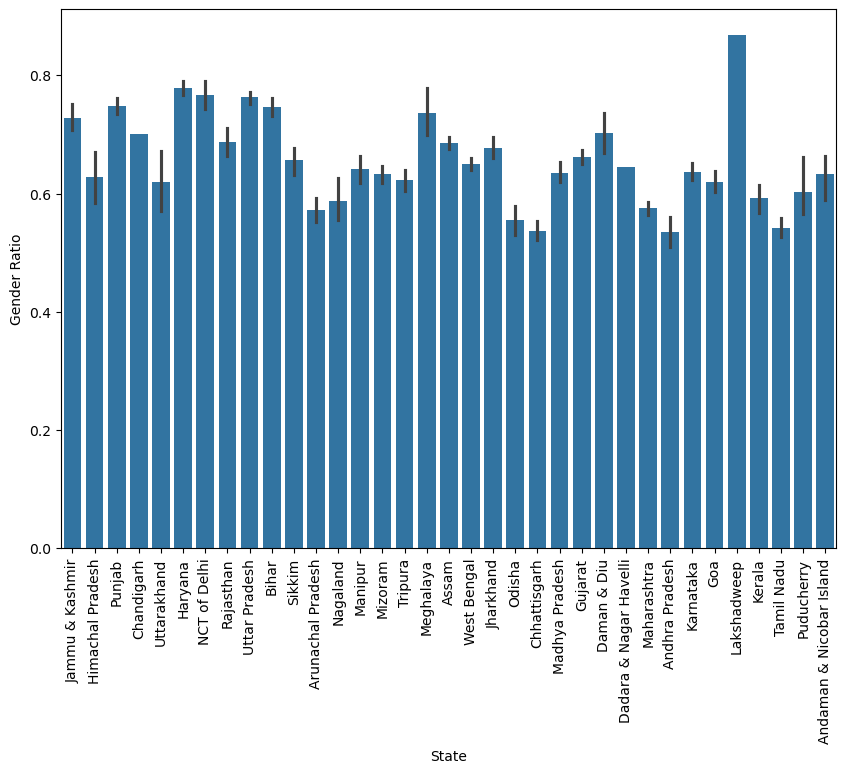

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(x = df_n['State'], y = df_n['TOT_GR'])
plt.ylabel('Gender Ratio')
plt.xticks(rotation=90)
plt.show()

In [46]:
pd.pivot_table(df_n, 'TOT_GR', index=['Dist.Code'], aggfunc=np.mean).sort_values(by='TOT_GR', ascending=True)

,TOT_GR
Dist.Code,
547,0.437972
398,0.440769
625,0.449352
546,0.450076
391,0.451455
...,...
139,0.844003
106,0.846911
144,0.847313


In [92]:
# creating a pivot table State wise gender Ratio considering Age group 0-6 and sorting it in descending order
pd.pivot_table(df_n, 'GR_06', index=['State'], aggfunc=np.mean).sort_values(by='GR_06', ascending=False)

,GR_06
State,
Haryana,1.166044
Punjab,1.144655
Chandigarh,1.143453
NCT of Delhi,1.128716
Uttarakhand,1.112626
Lakshadweep,1.083176
Jammu & Kashmir,1.078001
Himachal Pradesh,1.077095
Rajasthan,1.062975


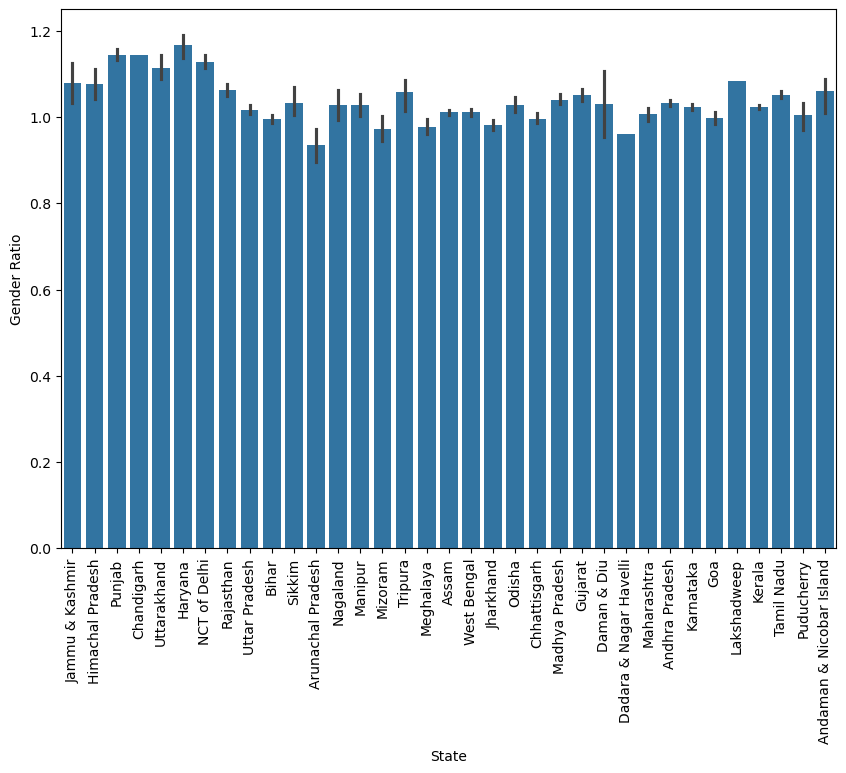

In [93]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_n['State'], y=df_n['GR_06'])
plt.ylabel('Gender Ratio')
plt.xticks(rotation=90)
plt.show()

In [94]:
# creating a pivot table District wise gender Ratio and sorting it in descending order
pd.pivot_table(df_n, 'TOT_GR', index=['Area Name'], aggfunc=np.mean).sort_values(by='TOT_GR', ascending=False)

,TOT_GR
Area Name,
Lakshadweep,0.868061
Badgam,0.847762
Mahamaya Nagar,0.847313
Dhaulpur,0.846911
Baghpat,0.844003
...,...
Baudh,0.451455
West Godavari,0.450076
Virudhunagar,0.449352


In [95]:
# creating a pivot table District wise gender Ratio considering the age group 0-6 and sorting it in descending order
pd.pivot_table(df_n, 'GR_06', index=['Area Name'], aggfunc=np.mean).sort_values(by='GR_06', ascending=False)

,GR_06
Area Name,
Samba,1.318776
Jammu,1.268102
Pithoragarh,1.253758
Mahendragarh,1.251514
Rewari,1.251050
...,...
Lower Subansiri,0.857692
Changlang,0.857305
Papum Pare,0.847979


In [96]:
df_n.groupby(['State','Area Name']).mean()['GR_06'].sort_values(ascending=False)

State              Area Name      
Jammu & Kashmir    Samba              1.318776
                   Jammu              1.268102
Uttarakhand        Pithoragarh        1.253758
Haryana            Mahendragarh       1.251514
                   Rewari             1.251050
                                        ...   
Arunachal Pradesh  Lower Subansiri    0.857692
                   Changlang          0.857305
                   Papum Pare         0.847979
Jammu & Kashmir    Kargil             0.831610
Arunachal Pradesh  East Kameng        0.811940
Name: GR_06, Length: 640, dtype: float64

In [97]:
df_pca.corr()

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
TOT_M,1.000000,0.982640,0.950825,0.947792,0.839925,0.826299,0.091421,0.086180,0.989312,0.931708,...,0.698310,0.595696,0.167405,0.115580,0.495928,0.440360,0.651604,0.588180,0.844896,0.716061
TOT_F,0.982640,1.000000,0.907975,0.906557,0.816959,0.832756,0.123626,0.128646,0.985441,0.957012,...,0.655347,0.598951,0.138763,0.099438,0.451011,0.443132,0.593805,0.571853,0.827653,0.746583
M_06,0.950825,0.907975,1.000000,0.998151,0.781120,0.747530,0.055274,0.043948,0.912757,0.832509,...,0.760610,0.646998,0.266674,0.198338,0.601090,0.514055,0.690601,0.565030,0.784961,0.651143
F_06,0.947792,0.906557,0.998151,1.000000,0.773135,0.741686,0.065138,0.054662,0.907641,0.829128,...,0.763614,0.649834,0.258670,0.189568,0.611568,0.523270,0.698636,0.574178,0.783727,0.651439
M_SC,0.839925,0.816959,0.781120,0.773135,1.000000,0.985071,-0.045666,-0.047825,0.818484,0.713939,...,0.673633,0.569579,0.184332,0.129750,0.523450,0.461898,0.664918,0.591437,0.735399,0.580020
F_SC,0.826299,0.832756,0.747530,0.741686,0.985071,1.000000,-0.014122,-0.009190,0.814150,0.728755,...,0.650455,0.585690,0.163427,0.116228,0.508006,0.488657,0.628470,0.589346,0.720099,0.600089
M_ST,0.091421,0.123626,0.055274,0.065138,-0.045666,-0.014122,1.000000,0.988047,0.090541,0.100488,...,0.122967,0.196571,0.027219,0.007077,0.126336,0.238813,-0.005482,0.090123,0.122986,0.146954
F_ST,0.086180,0.128646,0.043948,0.054662,-0.047825,-0.009190,0.988047,1.000000,0.087375,0.100892,...,0.121411,0.216741,0.017205,0.002556,0.136396,0.273307,-0.005880,0.099984,0.114131,0.150869
M_LIT,0.989312,0.985441,0.912757,0.907641,0.818484,0.814150,0.090541,0.087375,1.000000,0.967956,...,0.652507,0.560065,0.144067,0.101355,0.421762,0.381727,0.600120,0.552371,0.852199,0.738672
F_LIT,0.931708,0.957012,0.832509,0.829128,0.713939,0.728755,0.100488,0.100892,0.967956,1.000000,...,0.547296,0.484288,0.086819,0.063286,0.289115,0.272713,0.475349,0.464936,0.825726,0.772873


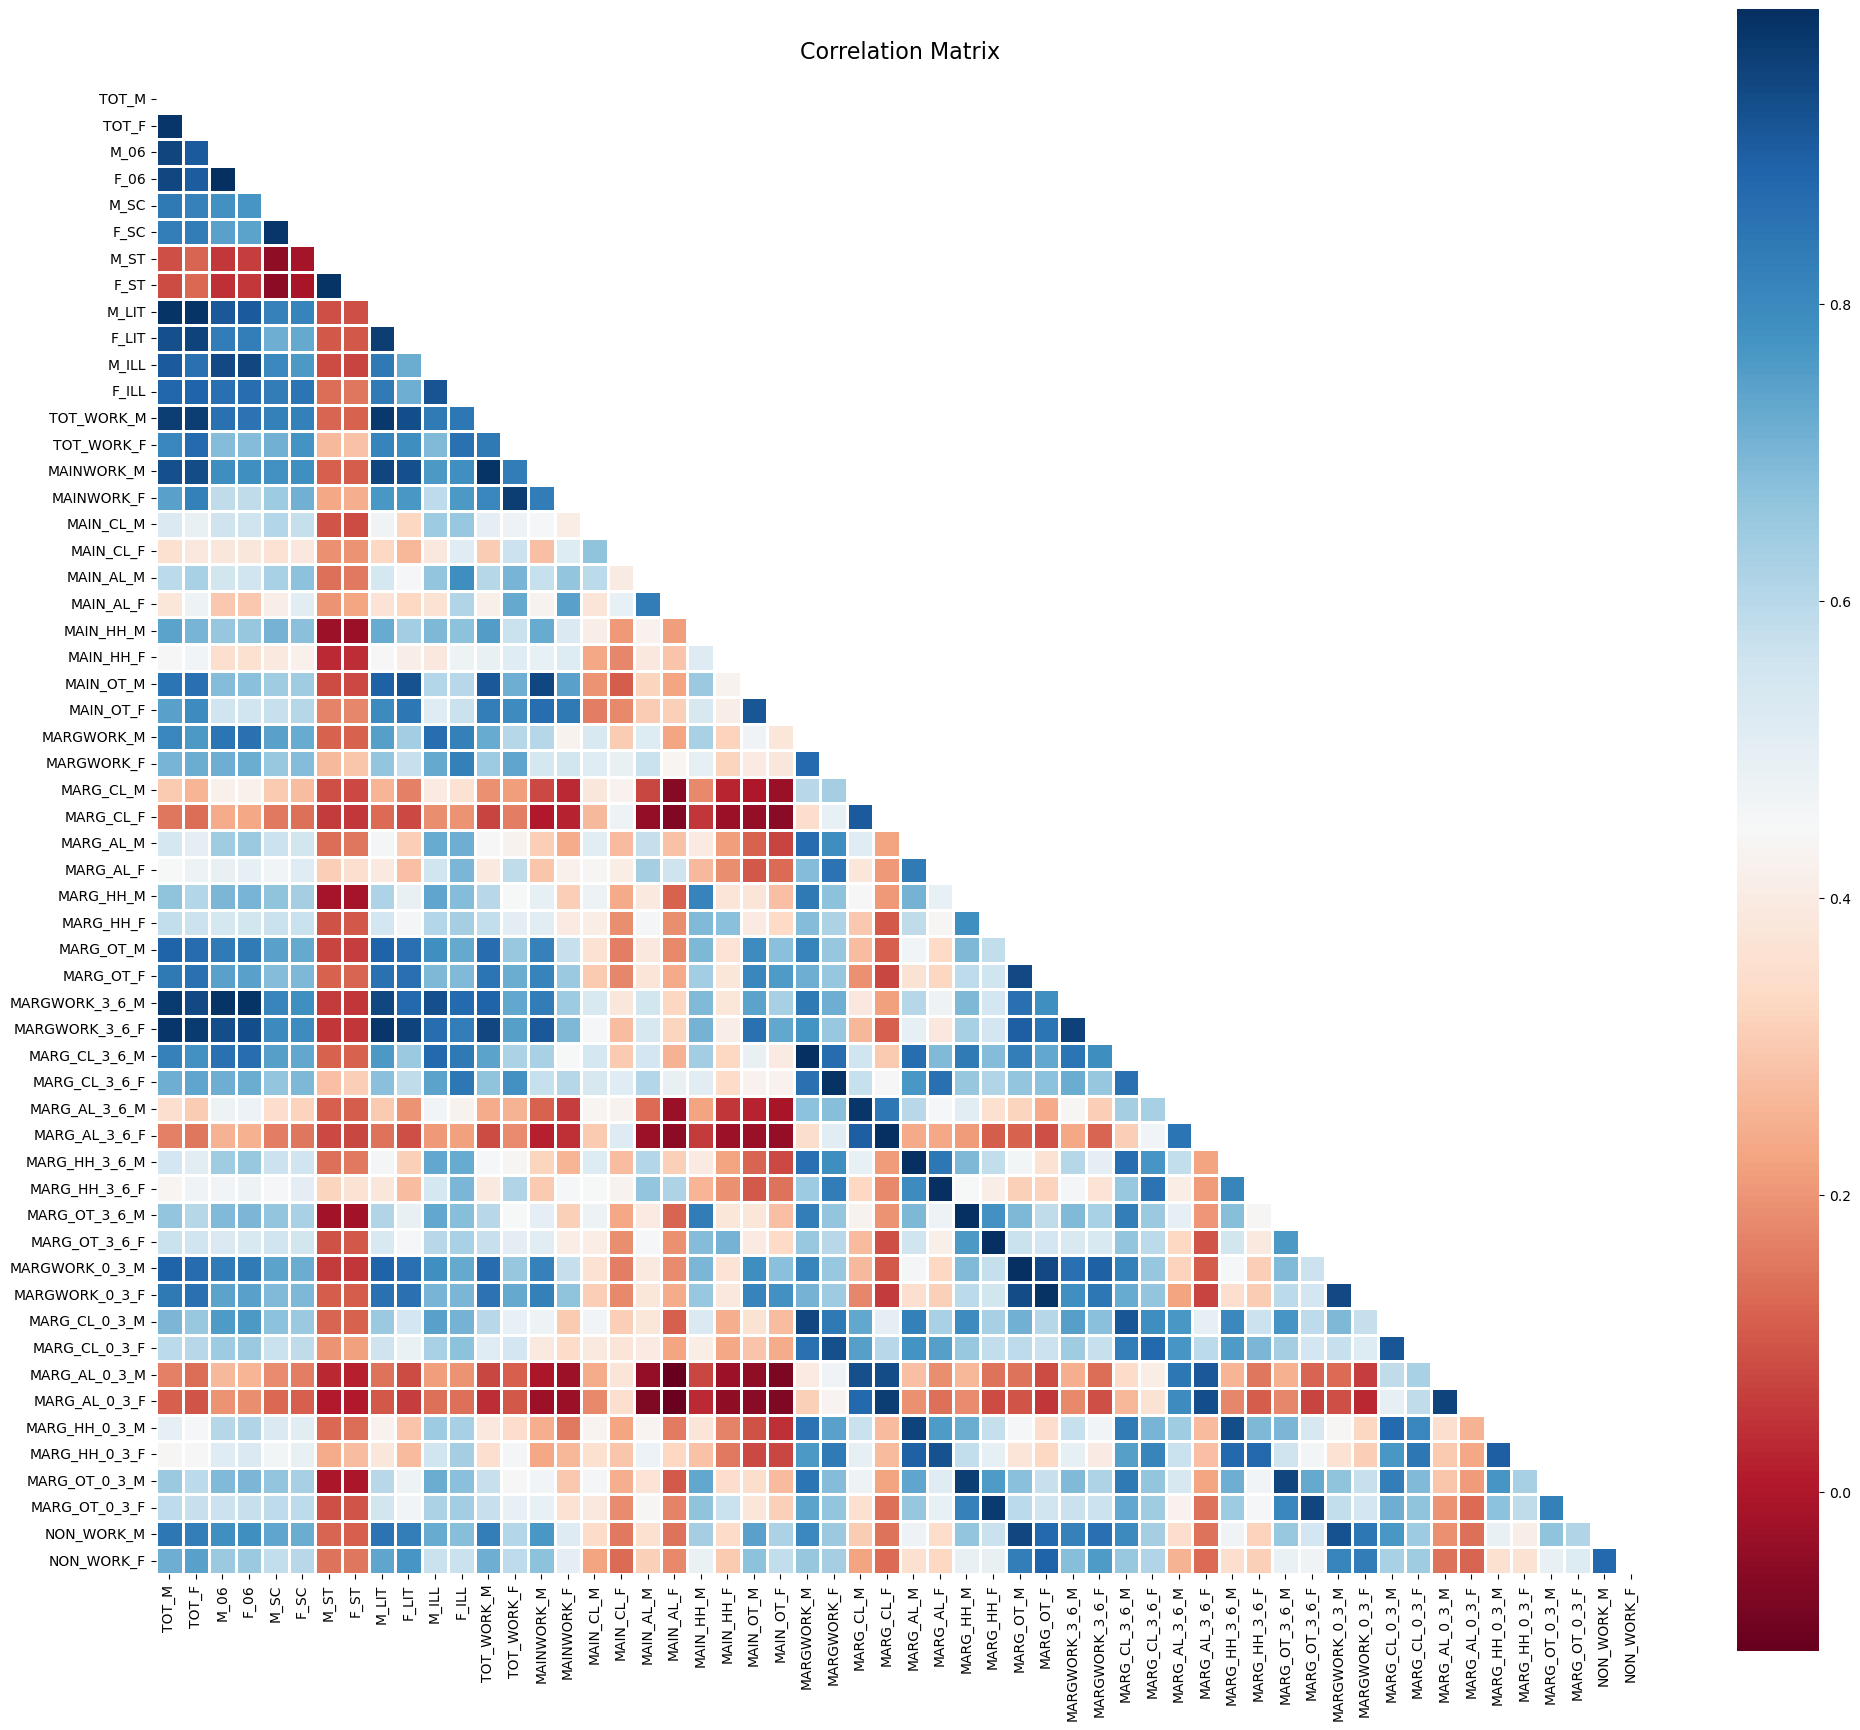

In [98]:
# correlation matrix
corr = df_pca.corr()                 
# taking one triangle from the plot
triu_mask = np.triu(corr)           

plt.figure(figsize=(24, 26))
sns.heatmap(
    corr,
    square=True,
    linewidths=2,
    annot=False,
    mask=triu_mask,  
    cbar_kws={"shrink": 0.82},
    cmap="RdBu",
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.show()

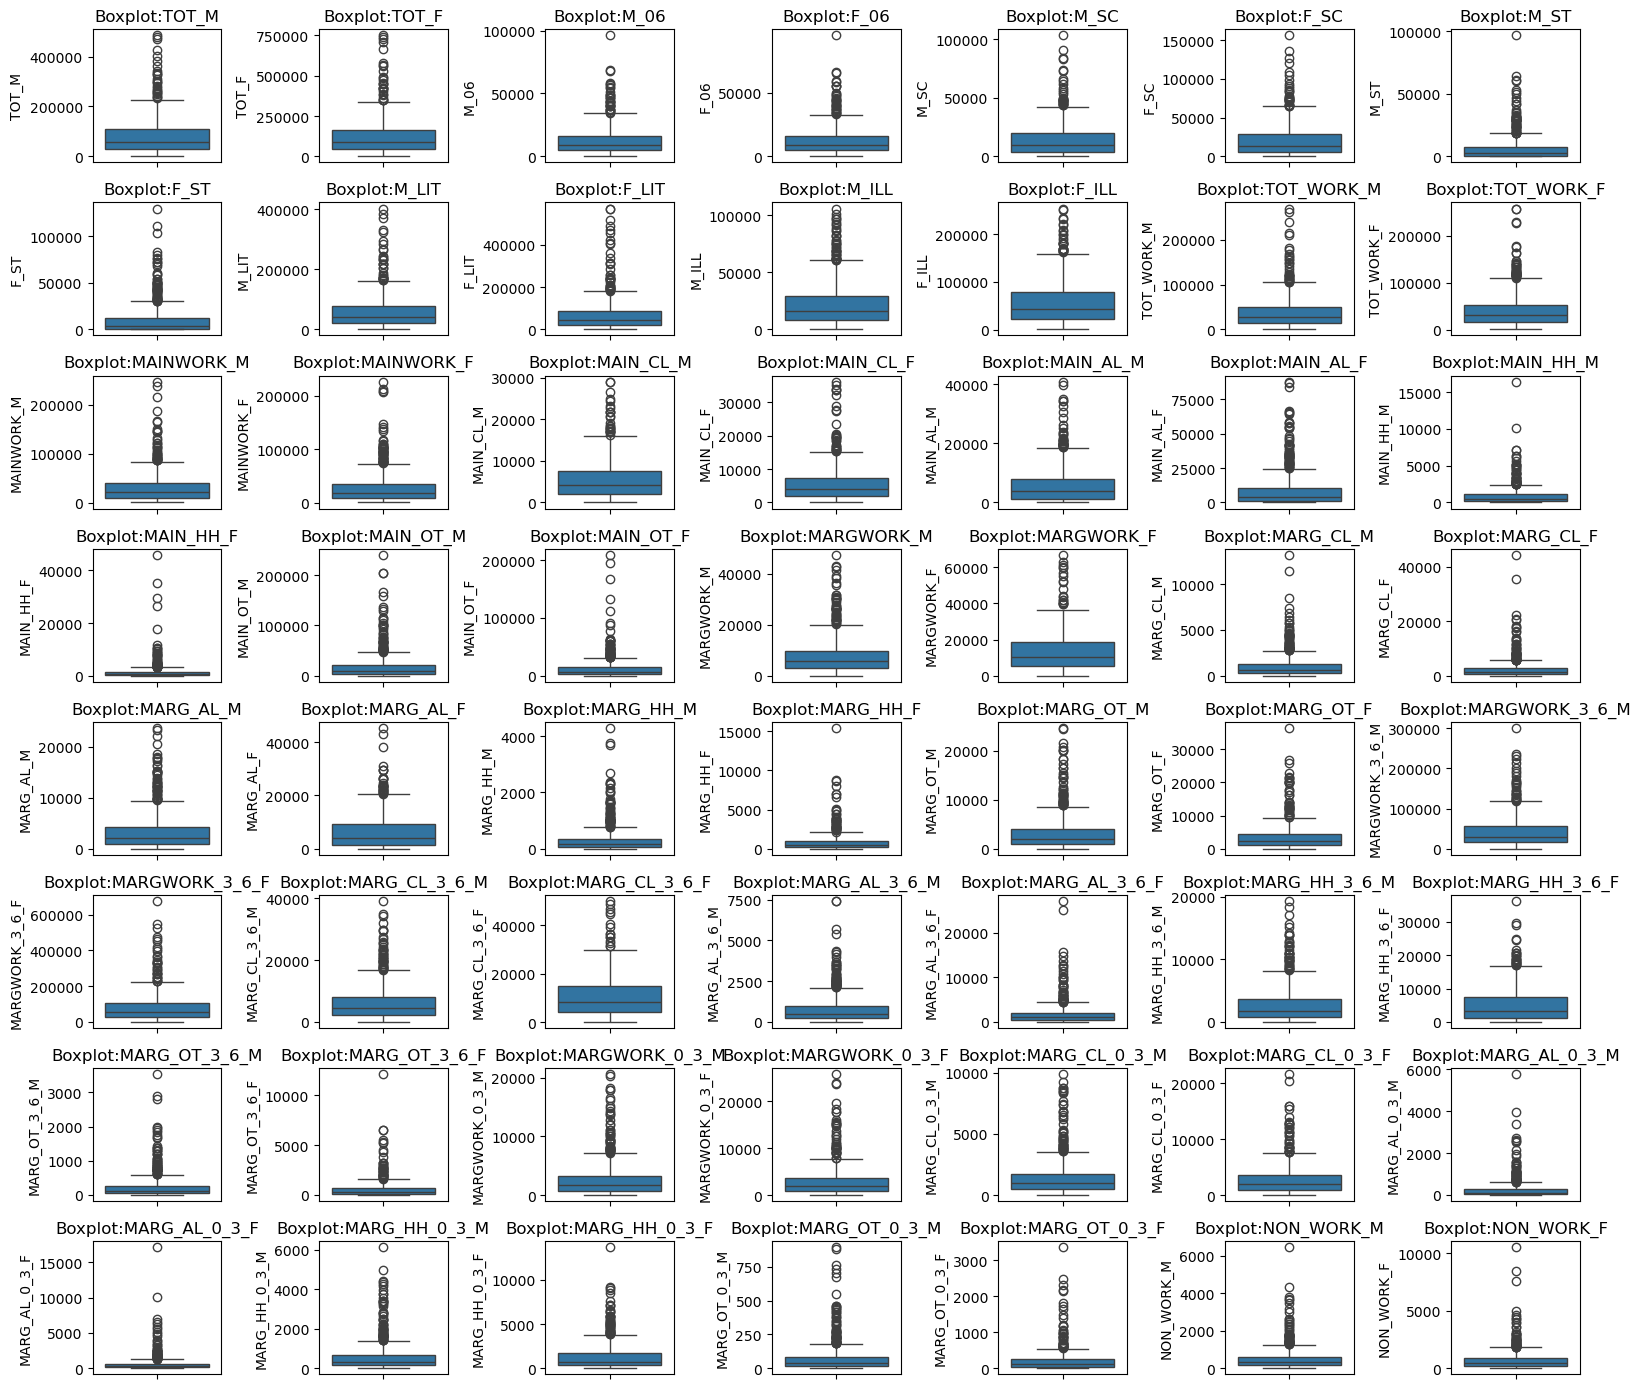

In [85]:
#checking for outlier in the dataset
plt.figure(figsize=(16,14))
feat_list = df_pca.columns
for i in range(len(feat_list)):
    plt.subplot(8,7,i+1)
    sns.boxplot(y=df_pca[feat_list[i]], data=df_pca)
    plt.title('Boxplot:{}'.format(feat_list[i]))
    plt.tight_layout()

In [49]:
#scale the data

df_pca_scaled=df_pca.apply(zscore)
df_pca_scaled.head()

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,-0.733477,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,-0.779797,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,-0.807151,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,-0.858872,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,-0.705296,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [105]:
df_pca_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TOT_M           640 non-null    float64
 1   TOT_F           640 non-null    float64
 2   M_06            640 non-null    float64
 3   F_06            640 non-null    float64
 4   M_SC            640 non-null    float64
 5   F_SC            640 non-null    float64
 6   M_ST            640 non-null    float64
 7   F_ST            640 non-null    float64
 8   M_LIT           640 non-null    float64
 9   F_LIT           640 non-null    float64
 10  M_ILL           640 non-null    float64
 11  F_ILL           640 non-null    float64
 12  TOT_WORK_M      640 non-null    float64
 13  TOT_WORK_F      640 non-null    float64
 14  MAINWORK_M      640 non-null    float64
 15  MAINWORK_F      640 non-null    float64
 16  MAIN_CL_M       640 non-null    float64
 17  MAIN_CL_F       640 non-null    flo

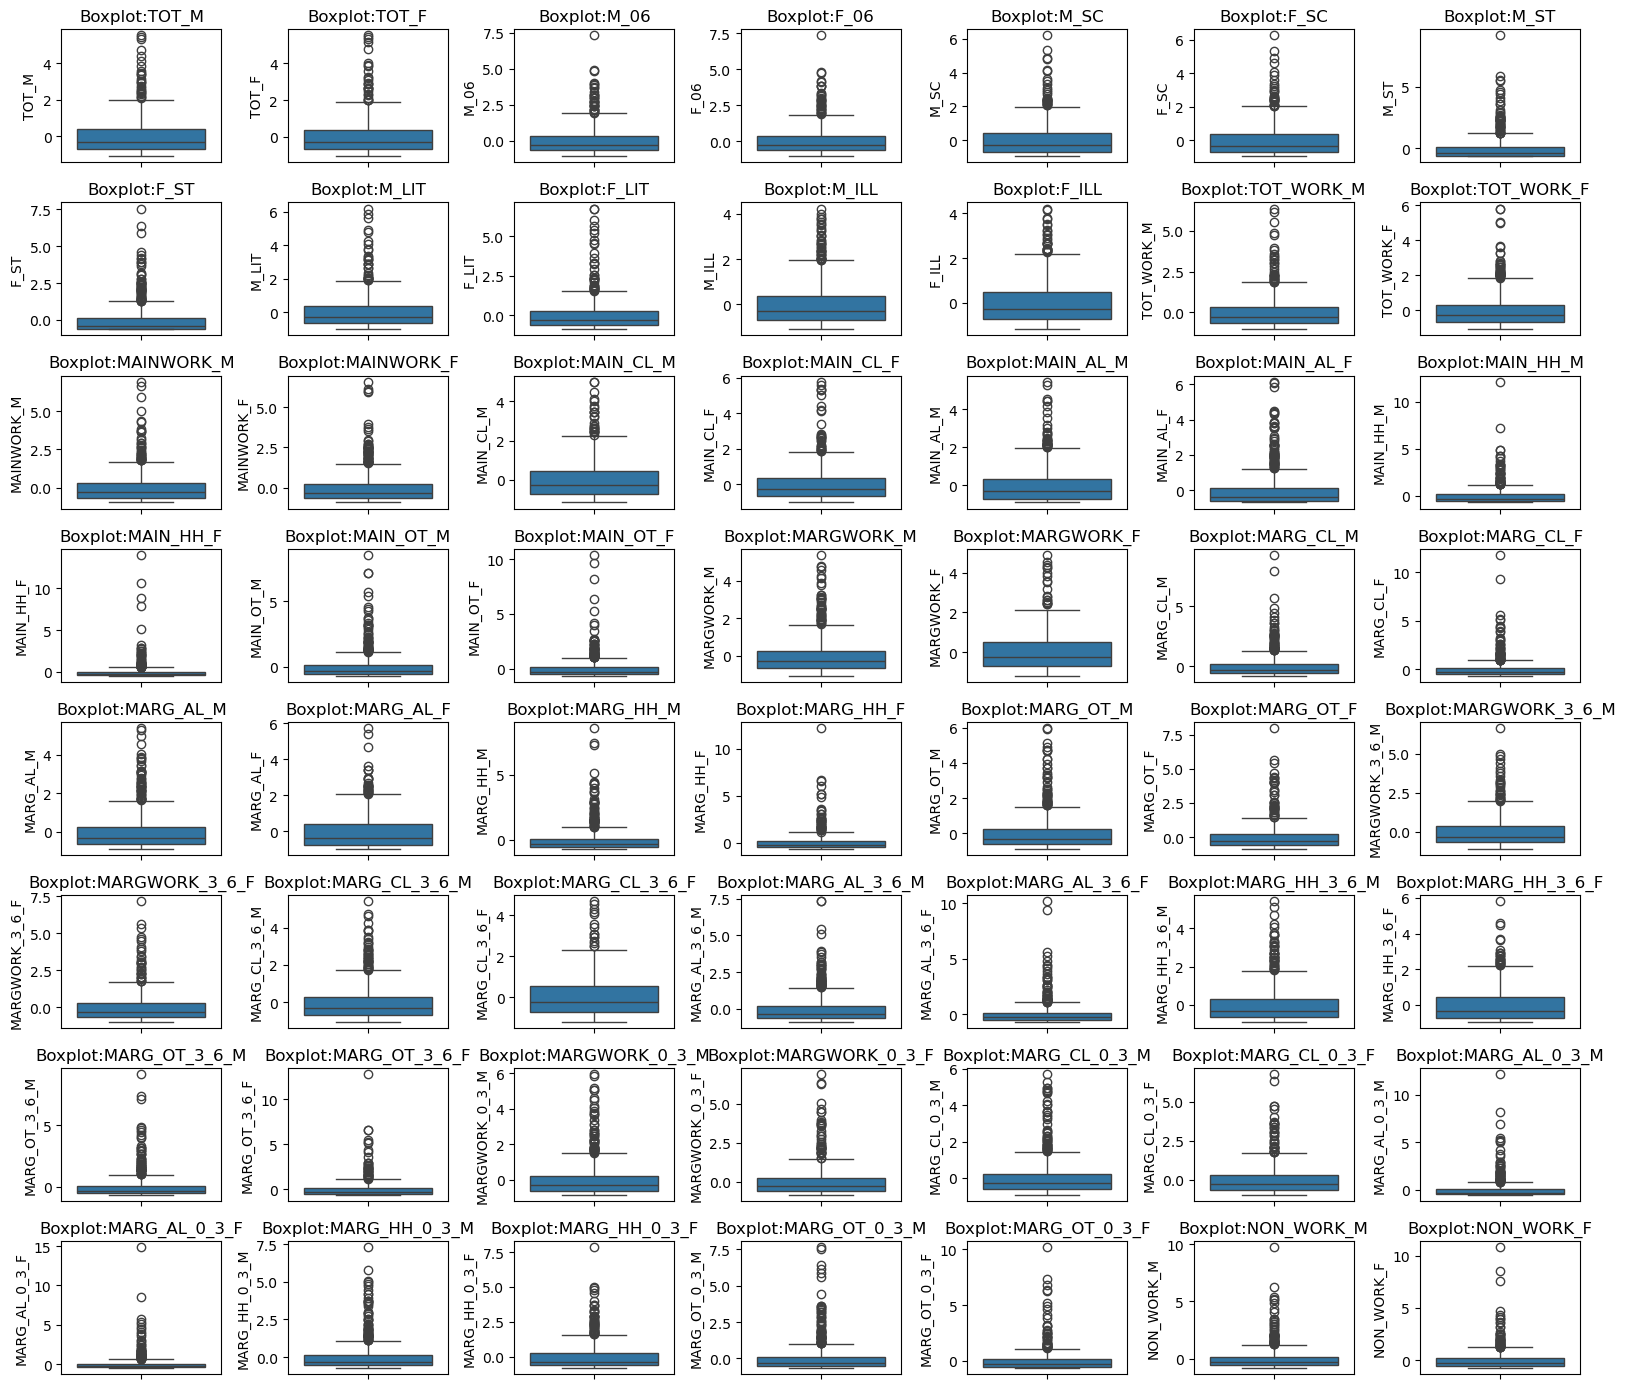

In [107]:
#checking for outlier in the dataset
plt.figure(figsize=(16,14))
feat_list = df_pca_scaled.columns
for i in range(len(feat_list)):
    plt.subplot(8,7,i+1)
    sns.boxplot(y=df_pca_scaled[feat_list[i]], data=df_pca_scaled)
    plt.title('Boxplot:{}'.format(feat_list[i]))
    plt.tight_layout()

### Statistical Significane of Correlation

Confirmation for statistical significance of co relation

H 
0: Corelaion are not significa

H ,
1: Corelation are significant

Reject 
0: if p < 0.05

In [111]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [112]:
#confirm the adequency of the sample size
#Note: Above kmo_model > 0.7 is Good and <0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8109864443708017

### Applying PCA

In [52]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)
pca_transformed

array([[-4.52684513,  0.12303802,  0.32477297, ..., -0.03629199,
         0.21826032,  0.3110302 ],
       [-4.67882944, -0.12870317,  0.23951189, ..., -0.19423388,
         0.39895648,  0.31007817],
       [-5.8853592 , -0.27288242,  0.36594999, ...,  0.01249849,
         0.13377887,  0.02019072],
       ...,
       [-6.20950515, -0.62863056,  0.10405918, ...,  0.03289594,
         0.12985799,  0.20469281],
       [-6.14614208, -0.65499183,  0.26851843, ...,  0.01700252,
         0.05280707,  0.12747437],
       [-5.83076859, -0.9189438 ,  0.34637288, ..., -0.06095129,
         0.0519214 ,  0.10210923]])

### Covariance Matrix

In [53]:
#covariance matrix
cov_mat = np.cov(df_pca_scaled.T)
cov_mat

array([[1.00156495, 0.98417823, 0.95231299, ..., 0.5891007 , 0.84621844,
        0.71718181],
       [0.98417823, 1.00156495, 0.90939623, ..., 0.572748  , 0.82894851,
        0.74775097],
       [0.95231299, 0.90939623, 1.00156495, ..., 0.56591416, 0.78618919,
        0.65216231],
       ...,
       [0.5891007 , 0.572748  , 0.56591416, ..., 1.00156495, 0.61052325,
        0.52191235],
       [0.84621844, 0.82894851, 0.78618919, ..., 0.61052325, 1.00156495,
        0.88228018],
       [0.71718181, 0.74775097, 0.65216231, ..., 0.52191235, 0.88228018,
        1.00156495]])

In [54]:
np.round(df_pca_scaled.cov(),2)

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
TOT_M,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,...,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,...,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,...,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,...,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,...,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,...,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,...,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,0.10,...,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,0.97,...,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74
F_LIT,0.93,0.96,0.83,0.83,0.72,0.73,0.10,0.10,0.97,1.00,...,0.55,0.49,0.09,0.06,0.29,0.27,0.48,0.47,0.83,0.77


### Eigen Vector

In [55]:
#extract eigen vector
pca.components_

array([[ 1.68547147e-01,  1.66605242e-01,  1.64165243e-01,
         1.64562632e-01,  1.52996391e-01,  1.52940303e-01,
         2.74810453e-02,  2.83878596e-02,  1.63102824e-01,
         1.47366621e-01,  1.63910507e-01,  1.66998116e-01,
         1.60838746e-01,  1.46469761e-01,  1.46635940e-01,
         1.23739954e-01,  1.04870439e-01,  7.54411527e-02,
         1.14068301e-01,  7.34727501e-02,  1.33145711e-01,
         8.38711544e-02,  1.23482797e-01,  1.10599756e-01,
         1.67517738e-01,  1.57829907e-01,  8.50399103e-02,
         5.09848671e-02,  1.31481028e-01,  1.16285596e-01,
         1.43745975e-01,  1.29795621e-01,  1.56867596e-01,
         1.48361985e-01,  1.66756931e-01,  1.62454535e-01,
         1.68319155e-01,  1.57919009e-01,  9.58488238e-02,
         5.33359286e-02,  1.31385264e-01,  1.12415081e-01,
         1.42433411e-01,  1.26569034e-01,  1.55867751e-01,
         1.47332261e-01,  1.53177967e-01,  1.42857457e-01,
         5.45496809e-02,  4.34724137e-02,  1.24863483e-0

In [56]:
#extract eigen values for each PC
#Note:This is alawys returned in descendin order
pca.explained_variance_

array([31.04602689,  7.74229066,  4.15338002,  3.6086627 ,  2.20641038,
        1.93824124,  1.15914355,  0.74854534,  0.6170419 ,  0.52808406,
        0.42978387,  0.35091506])

In [57]:
#extract explained variance for each PC
#Note:Explained Variance ratio = eigen values of each pcs/sum of all pcs
pca.explained_variance_ratio_

array([0.5535271 , 0.13803917, 0.07405161, 0.06433972, 0.03933862,
       0.03455737, 0.02066665, 0.013346  , 0.01100139, 0.00941534,
       0.00766272, 0.00625655])

#### The Optimum number of PCs for 90 % vairance is 5

In [58]:
#Create a dataframe containing the loadings or coefficients of all PCs
pca_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = df_pca_scaled.columns)

In [59]:
pca_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
TOT_M,0.168547,-0.094738,0.056601,-0.027099,-0.033485,-0.073121,0.086063,0.112510,0.019137,-0.023605,0.011482,0.021701
TOT_F,0.166605,-0.108873,0.038782,-0.077830,-0.013307,-0.043412,-0.006509,0.090605,0.015172,-0.037384,0.007661,0.094333
M_06,0.164165,-0.027200,0.057654,0.006567,-0.050635,-0.157713,0.164420,0.168933,-0.056501,-0.153171,0.081140,0.109556
F_06,0.164563,-0.025412,0.049985,0.009531,-0.044227,-0.154196,0.168634,0.168626,-0.059060,-0.169259,0.081771,0.109626
M_SC,0.152996,-0.049895,0.002433,0.007256,-0.173308,-0.064084,-0.008247,-0.127011,0.037397,0.450075,-0.227177,-0.062222
F_SC,0.152940,-0.055754,-0.025125,-0.034768,-0.160092,-0.040343,-0.091967,-0.141031,0.041150,0.448355,-0.211690,0.002141
M_ST,0.027481,0.029232,-0.123022,-0.227647,0.432293,0.223053,0.403940,0.015818,0.018298,0.159559,0.067513,0.017412
F_ST,0.028388,0.032066,-0.139260,-0.234733,0.437965,0.225956,0.356070,0.009384,0.043558,0.134016,0.053172,0.023523
M_LIT,0.163103,-0.120102,0.082100,-0.042616,-0.009562,-0.055213,0.041829,0.101135,0.045458,-0.004867,-0.030056,0.078701
F_LIT,0.147367,-0.157002,0.117085,-0.066948,0.055421,-0.047829,-0.024526,0.112258,0.022230,-0.040373,-0.033961,0.190917


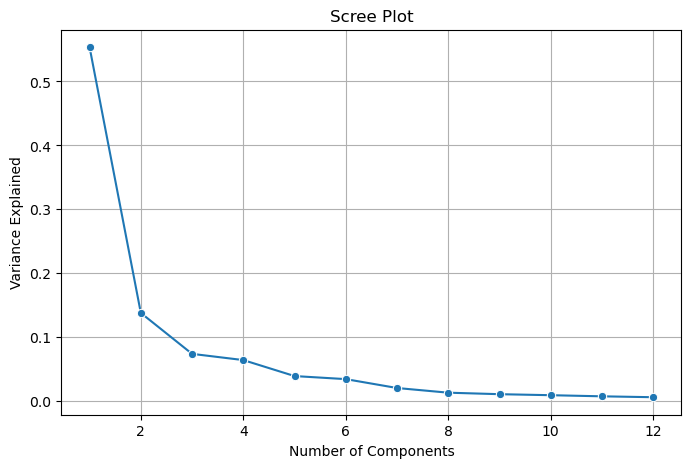

In [133]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [134]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.5535271 , 0.69156626, 0.76561788, 0.8299576 , 0.86929622,
       0.90385359, 0.92452024, 0.93786623, 0.94886762, 0.95828296,
       0.96594568, 0.97220223])

In [62]:
df1_pca_loading = pd.DataFrame(pca.components_, columns = list(df_pca_scaled))
df1_pca_loading.shape

(12, 56)

In [63]:
df1_pca_loading

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.168547,0.166605,0.164165,0.164563,0.152996,0.152940,0.027481,0.028388,0.163103,0.147367,...,0.153178,0.142857,0.054550,0.043472,0.124863,0.118519,0.142828,0.134541,0.152033,0.132102
1,-0.094738,-0.108873,-0.027200,-0.025412,-0.049895,-0.055754,0.029232,0.032066,-0.120102,-0.157002,...,0.146628,0.179272,0.253535,0.243722,0.181745,0.179374,0.078160,0.045218,-0.071294,-0.077812
2,0.056601,0.038782,0.057654,0.049985,0.002433,-0.025125,-0.123022,-0.139260,0.082100,0.117085,...,0.054719,0.024117,0.268735,0.285439,-0.138870,-0.202122,-0.023167,-0.079217,0.111507,0.102411
3,-0.027099,-0.077830,0.006567,0.009531,0.007256,-0.034768,-0.227647,-0.234733,-0.042616,-0.066948,...,0.089502,-0.018582,-0.097636,-0.128522,0.136327,0.007441,0.230332,0.207395,0.079891,0.017342
4,-0.033485,-0.013307,-0.050635,-0.044227,-0.173308,-0.160092,0.432293,0.437965,-0.009562,0.055421,...,0.081417,0.130170,-0.048741,-0.051800,0.062789,0.128550,-0.036019,0.000739,0.162772,0.238276
5,-0.073121,-0.043412,-0.157713,-0.154196,-0.064084,-0.040343,0.223053,0.225956,-0.055213,-0.047829,...,-0.060857,-0.001934,0.065342,0.083669,-0.124445,-0.105739,0.061103,0.295334,-0.052365,-0.024988
6,0.086063,-0.006509,0.164420,0.168634,-0.008247,-0.091967,0.403940,0.356070,0.041829,-0.024526,...,-0.004422,-0.201223,-0.040127,-0.102676,0.021569,-0.150907,0.085552,-0.064178,-0.023051,-0.205764
7,0.112510,0.090605,0.168933,0.168626,-0.127011,-0.141031,0.015818,0.009384,0.101135,0.112258,...,0.030041,0.004076,0.077527,0.060400,0.136397,0.069855,-0.178893,0.043255,-0.123001,-0.198068
8,0.019137,0.015172,-0.056501,-0.059060,0.037397,0.041150,0.018298,0.043558,0.045458,0.022230,...,-0.011870,-0.034871,0.033246,0.048186,0.054872,0.123903,0.218630,-0.080194,-0.160807,-0.354530
9,-0.023605,-0.037384,-0.153171,-0.169259,0.450075,0.448355,0.159559,0.134016,-0.004867,-0.040373,...,0.144757,0.054192,0.146760,0.130036,0.068696,-0.039510,-0.039150,0.073640,0.165331,0.050125


In [65]:
#Choose the PCs basis cumulative explained variance
pca_selected = pca_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [66]:
#Check the selected PCs
pca_selected.T

,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC1,0.168547,0.166605,0.164165,0.164563,0.152996,0.152940,0.027481,0.028388,0.163103,0.147367,...,0.153178,0.142857,0.054550,0.043472,0.124863,0.118519,0.142828,0.134541,0.152033,0.132102
PC2,-0.094738,-0.108873,-0.027200,-0.025412,-0.049895,-0.055754,0.029232,0.032066,-0.120102,-0.157002,...,0.146628,0.179272,0.253535,0.243722,0.181745,0.179374,0.078160,0.045218,-0.071294,-0.077812
PC3,0.056601,0.038782,0.057654,0.049985,0.002433,-0.025125,-0.123022,-0.139260,0.082100,0.117085,...,0.054719,0.024117,0.268735,0.285439,-0.138870,-0.202122,-0.023167,-0.079217,0.111507,0.102411
PC4,-0.027099,-0.077830,0.006567,0.009531,0.007256,-0.034768,-0.227647,-0.234733,-0.042616,-0.066948,...,0.089502,-0.018582,-0.097636,-0.128522,0.136327,0.007441,0.230332,0.207395,0.079891,0.017342
PC5,-0.033485,-0.013307,-0.050635,-0.044227,-0.173308,-0.160092,0.432293,0.437965,-0.009562,0.055421,...,0.081417,0.130170,-0.048741,-0.051800,0.062789,0.128550,-0.036019,0.000739,0.162772,0.238276


#### PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

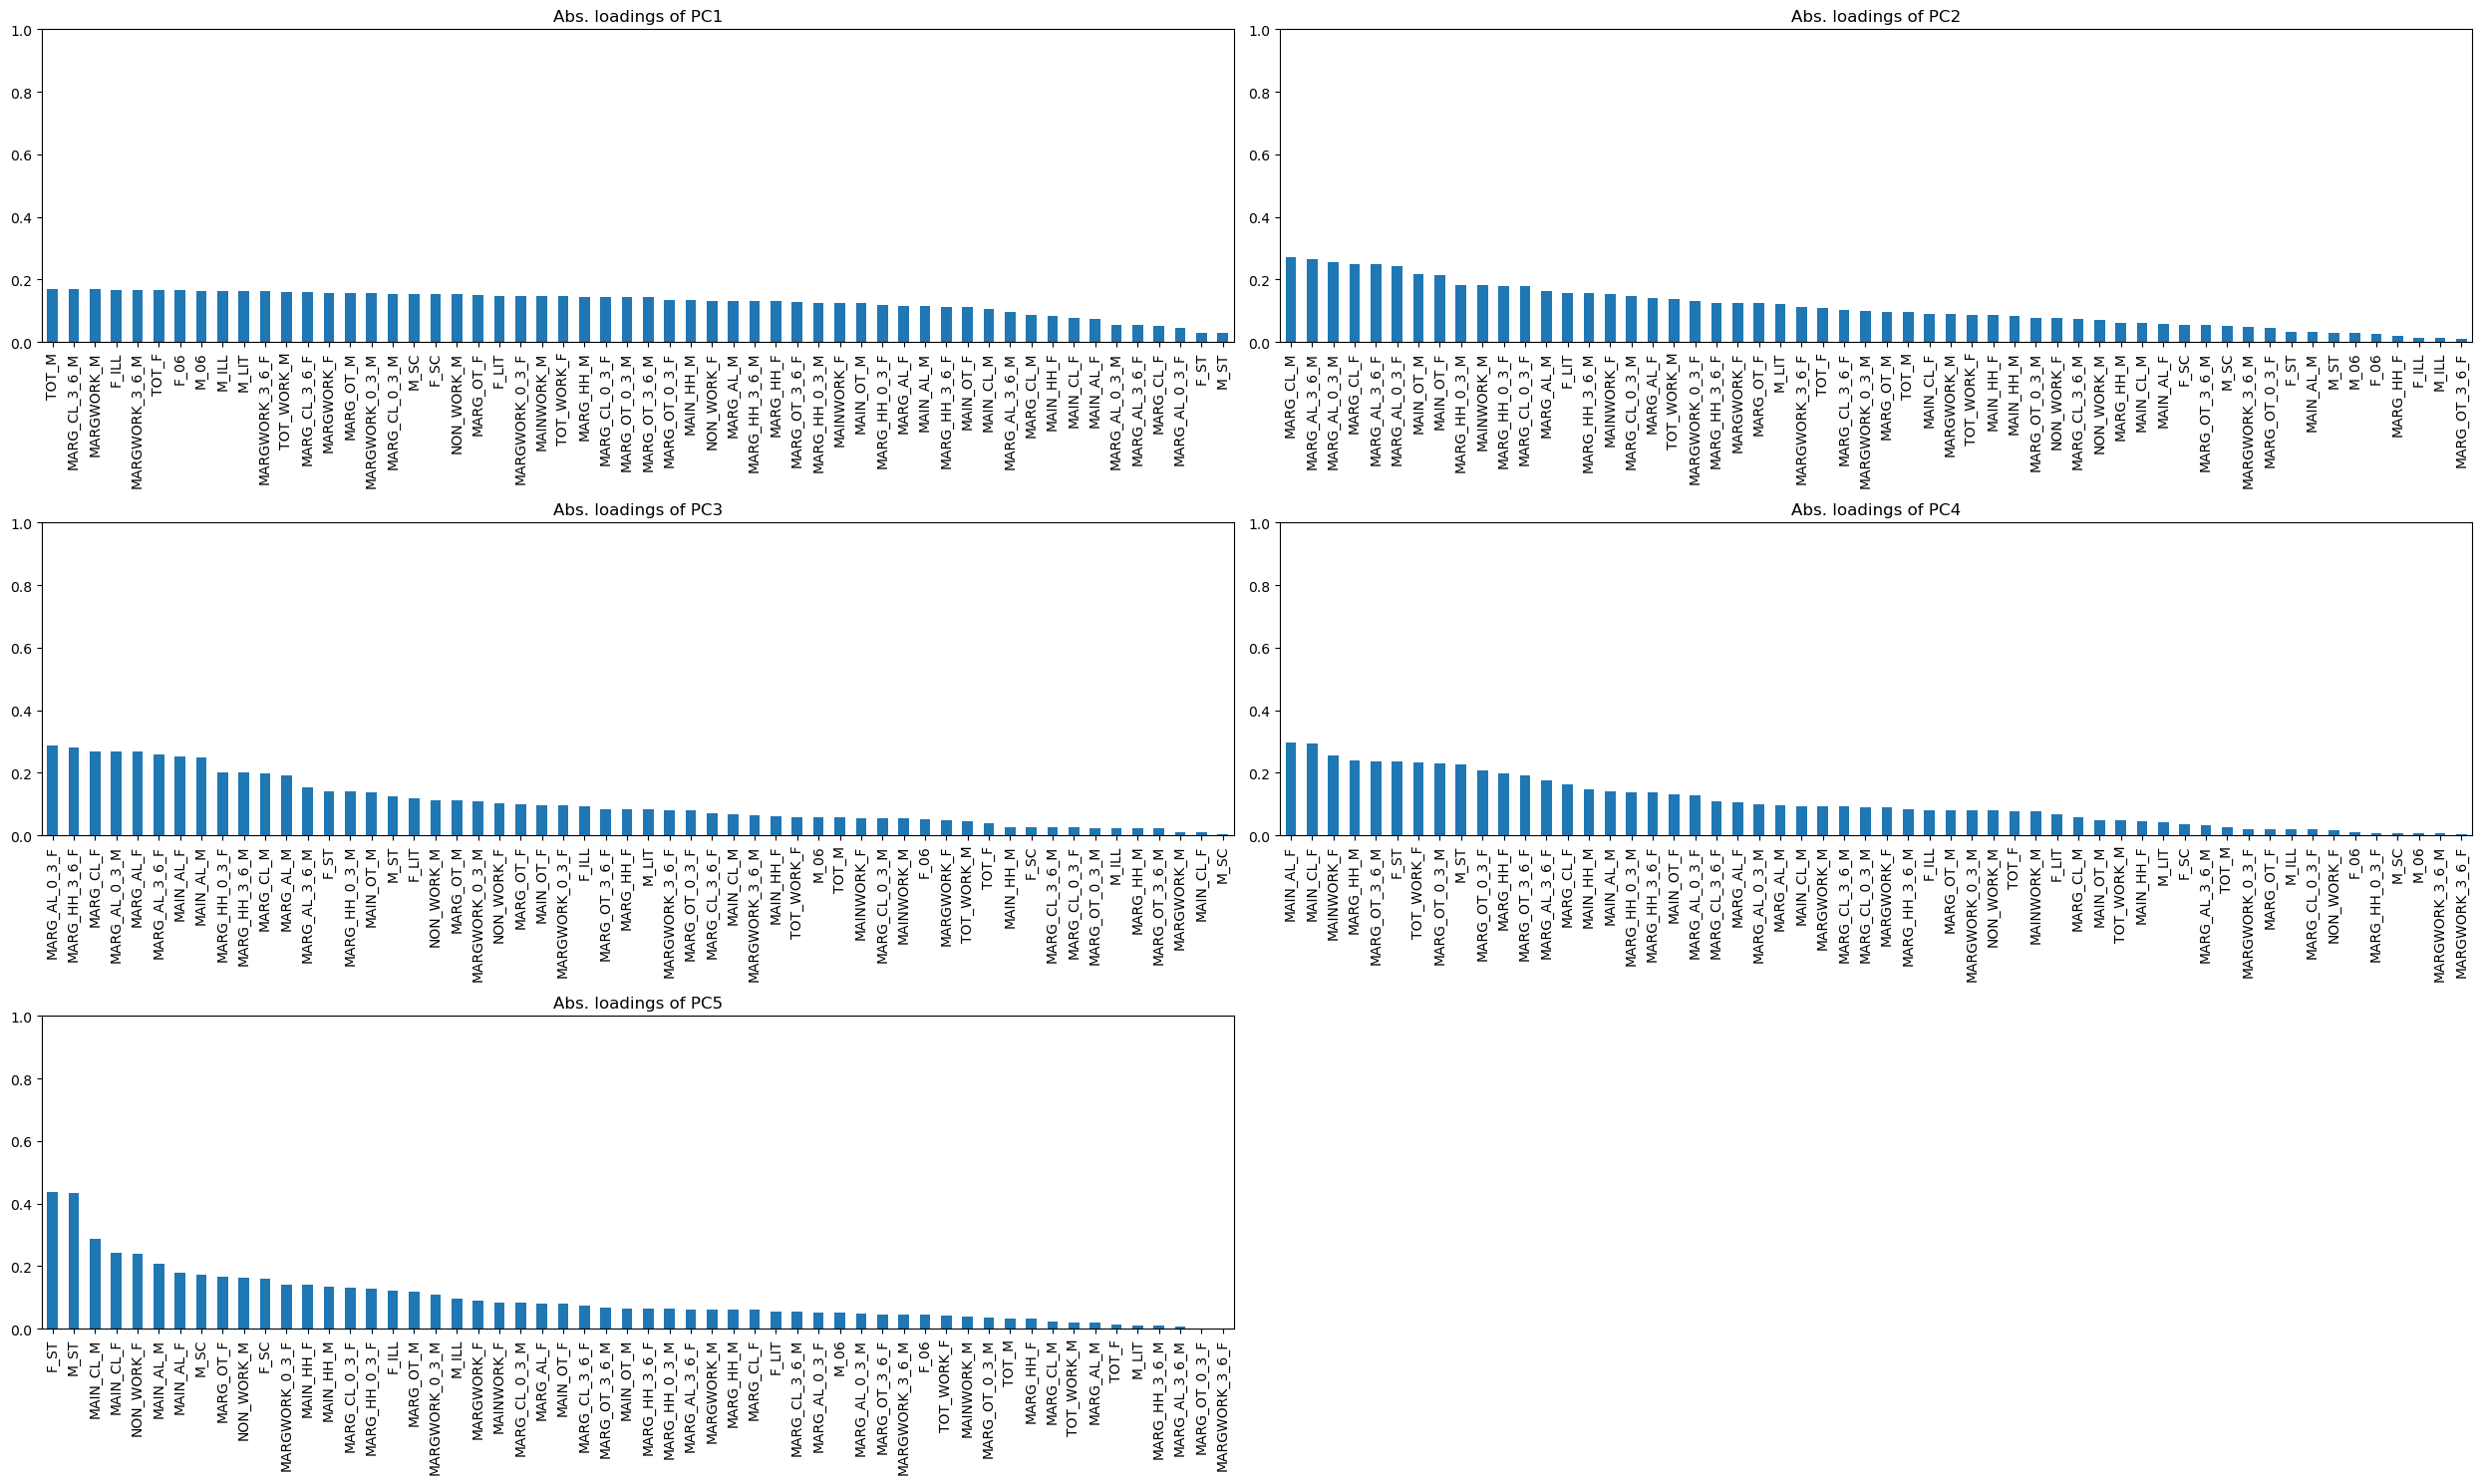

In [147]:
#Checking as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (25,15))
for i in range(len(pca_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(pca_selected[pca_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(pca_selected.columns[i]))
    plt.tight_layout()

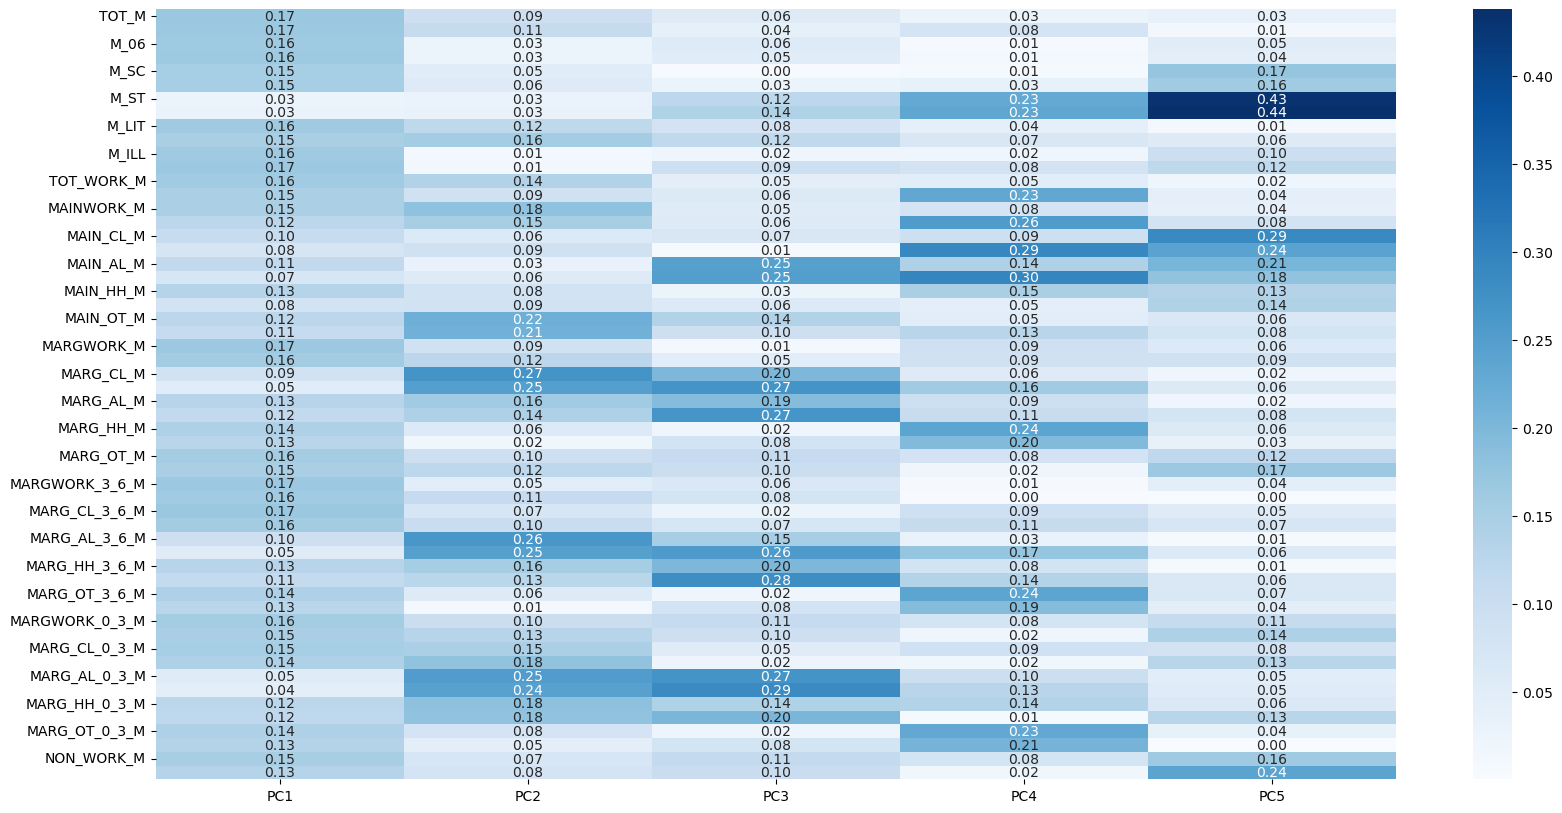

In [148]:
#Comparing how the original features influence various PCs
plt.figure(figsize = (20,10))
sns.heatmap(abs(pca_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [149]:
#In order to calculate PC scores we need loadings, below:
pca_selected

,PC1,PC2,PC3,PC4,PC5
TOT_M,0.168547,-0.094738,0.056601,-0.027099,-0.033485
TOT_F,0.166605,-0.108873,0.038782,-0.077830,-0.013307
M_06,0.164165,-0.027200,0.057654,0.006567,-0.050635
F_06,0.164563,-0.025412,0.049985,0.009531,-0.044227
M_SC,0.152996,-0.049895,0.002433,0.007256,-0.173308
F_SC,0.152940,-0.055754,-0.025125,-0.034768,-0.160092
M_ST,0.027481,0.029232,-0.123022,-0.227647,0.432293
F_ST,0.028388,0.032066,-0.139260,-0.234733,0.437965
M_LIT,0.163103,-0.120102,0.082100,-0.042616,-0.009562
F_LIT,0.147367,-0.157002,0.117085,-0.066948,0.055421


In [151]:
#original scaled features
df_pca_scaled.iloc[0]

TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
MARG_CL_3_6_M    -0.595998
M

In [153]:
#Extract the required(as per the cumulative explained variance) number of PCs to obtain the scores

pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [155]:
#creating a dataframe out of fit_transformed scaled data above
pca_final1 = pd.DataFrame(pca_final, columns = pca_selected.columns)
pca_final1.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-4.526845,0.123038,0.324773,1.549365,0.356633
1,-4.678829,-0.128703,0.239512,1.964626,-0.150259
2,-5.885359,-0.272882,0.365950,0.625611,0.479500
3,-6.195422,-0.486110,0.210054,1.078865,0.303087
4,-4.396884,0.906417,1.077570,0.566575,0.806315
5,-3.229257,2.847568,3.061168,-0.370874,0.744715
6,-4.956265,-0.333367,0.648067,0.991665,-0.057502
7,-4.524516,0.010572,0.394928,1.585141,0.174548
8,-5.091510,-0.073163,0.180116,1.740585,0.172712
9,-4.165178,-1.351084,0.693473,1.443441,0.270820


In [172]:
#Loading the dataset in X
X = df_pca

In [173]:
# Initialize the PCA algorithm with 5 principal components
pca = PCA(n_components=5)

In [174]:
# Fit the PCA model to the data
pca.fit(X)

PCA(n_components=5)

In [175]:
# Get the coefficients of the first principal component
coefficients = pca.components_[0]

In [176]:
# Writing the linear equation for the first PC
equation = "PC1 = "
for i, coef in enumerate(coefficients):
    equation += f"{coef:.3f} * x{i+1} + "
equation = equation[:-3]  # Remove the trailing " + "
print(equation)

PC1 = 0.355 * x1 + 0.554 * x2 + 0.052 * x3 + 0.051 * x4 + 0.058 * x5 + 0.088 * x6 + 0.005 * x7 + 0.009 * x8 + 0.271 * x9 + 0.352 * x10 + 0.084 * x11 + 0.201 * x12 + 0.174 * x13 + 0.155 * x14 + 0.146 * x15 + 0.117 * x16 + 0.011 * x17 + 0.009 * x18 + 0.019 * x19 + 0.027 * x20 + 0.004 * x21 + 0.007 * x22 + 0.111 * x23 + 0.074 * x24 + 0.028 * x25 + 0.038 * x26 + 0.002 * x27 + 0.002 * x28 + 0.009 * x29 + 0.015 * x30 + 0.001 * x31 + 0.003 * x32 + 0.016 * x33 + 0.017 * x34 + 0.181 * x35 + 0.399 * x36 + 0.023 * x37 + 0.030 * x38 + 0.001 * x39 + 0.002 * x40 + 0.007 * x41 + 0.011 * x42 + 0.001 * x43 + 0.002 * x44 + 0.013 * x45 + 0.014 * x46 + 0.005 * x47 + 0.008 * x48 + 0.000 * x49 + 0.001 * x50 + 0.002 * x51 + 0.003 * x52 + 0.000 * x53 + 0.001 * x54 + 0.003 * x55 + 0.003 * x56
